## 7. Di-electron analysis

You will now perform an analysis of the invariant mass spectrum of $10^5$ electron/positron pairs recorded by the CMS collaboration in 2010.  (Important to note that this comprises a miniscule fraction of all of the data that CMS has collected.)  The data is in csv format in the file `CMS_dielectron.csv`.  

A note on units: In these data files, energies are reported in GeV (giga-electron-volts) and momenta are reported in GeV/$c$.  Make sure that you are accounting for the factors of $c$ in your calculations.  (These odd units actually make the calculations quite easy.)

Each row in the file corresponds to an event.  The `E1,px1,py1,pz1` quantities are the energy and momentum components of particle 1 (electron) and `E2,px2,py2,pz2` are those for particle 2 (positron).  All other values in the file may be ignored.

Perform the following steps:
1. Read in the events in the file line-by-line.
1. For each event, calculate the following quantites.  Store these values in arrays or lists for plotting later. 
    - invariant mass^2 of the electron and for the positron
    - total energy of the di-lepton pair
    - magnitude of momentum for the electron and for the position
    - magnitude of total momentum for the di-lepton pair
    - invariant mass of the electron/positron pair
1. Make histograms of $E_1$, $E_2$, $E_i$, $p_1$, $p_2$, $p_i$
1. Make histograms of $m_1$, $m_2$.  Are these in fact electrons/positrons?  Could they be any other stable particle?
1. Make a histogram of the di-lepton invariant mass, $m_i$.  Your histogram should show the invariant mass range from 0 to roughly 100 GeV, and should have roughly 300 bins.  A logarithmic $y$-axis will be helpful going forward.
1. In the invariant-mass distrubtion, you'll see several peaks!  These are particles that decayed into $e^+,e^-$ pairs!  WOW!  One of these peaks should be at $m_i\approx 90$~GeV.  Make another histogram of the invariant masses between 65 and 100 GeV.  Use the fitting approach above to extract the mean mass and width of this peak.  Use this infomation and the PDG to identify the parent particle.  (Congrats, you just won a Nobel Prize.)
1. Identify the particles associated with at least two of the other peaks in the invariant-mass distribution.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

E1, E2 = [], [] # set up of initial arrays
px1, px2, py1, py2, pz1, pz2 = [], [], [], [], [], []

f = open('CMS_dielectron.csv', 'r')
lin = f.readline() # get rid of first line
lin = f.readline() 
while len(lin) > 1:
    arr = lin.split(',') # splits the columns into an array
    E1.append(float(arr[2])) # pulls out data from needed columns and appends
    E2.append(float(arr[10])) # to individual arrays for calculations/plotting
    px1.append(float(arr[3])) 
    px2.append(float(arr[11]))
    py1.append(float(arr[4]))
    py2.append(float(arr[12]))
    pz1.append(float(arr[5]))
    pz2.append(float(arr[13]))
    lin = f.readline() # reads in next line for the next loop
    
    
Ei = [] # set up arrays for values that must be calculated
p1 = []
p2 = []
pi = []
m1_sq = []
m2_sq = []

px = []
py = []
pz = []
mp = []
for i in range(100000):
    Ei.append(E1[i] + E2[i]) # loop does the calculation and appends for each index
    p1.append(math.sqrt(px1[i]**2 + py1[i]**2 + pz1[i]**2))
    p2.append(math.sqrt(px2[i]**2 + py2[i]**2 + pz2[i]**2))
    pi.append(math.sqrt(p1[i]**2 + p2[i]**2 + 2*(px1[i] * px2[i] + py1[i] * py2[i] + pz1[i] * pz2[i])))
    m1_sq.append(E1[i]**2 - p1[i]**2)
    m2_sq.append(E2[i]**2 - p2[i]**2)
    
    px.append(px1[i] + px2[i])
    py.append(py1[i] + py2[i])
    pz.append(pz1[i] + pz2[i])
    if Ei[i]**2 - px[i]**2 - py[i]**2 - pz[i]**2 > 0:
        mp.append(math.sqrt((Ei[i]**2 - px[i]**2 - py[i]**2 - pz[i]**2)))
    else:
        mp.append(0)
# if statement allows for terms resulting in a negative in the square root to just be inputted as 0
# calculates the mass of the parent particle for each event, accounting for units of momentum


print(E1[0:10]) # used to check that all data points were pulled in and that the data was correct
print(E2[0:10])
print(Ei[0:10])
print(p1[0:10])
print(p2[0:10])
print(m1_sq[0:10])
print(m2_sq[0:10])
print(mp[0:10])
print(len(E1), len(E2), len(Ei), len(p1), len(p2), len(m1_sq), len(m2_sq), len(mp))

[58.7141, 6.61188, 25.5419, 65.3959, 61.4504, 6.39616, 84.5058, 77.0057, 9.68787, 27.8812]
[11.2836, 17.1492, 15.8203, 25.1273, 13.8871, 21.3865, 12.6784, 9.11623, 63.4597, 12.9218]
[69.99770000000001, 23.76108, 41.3622, 90.5232, 75.3375, 27.78266, 97.18419999999999, 86.12193, 73.14757, 40.803]
[58.7141329485704, 6.611878302443641, 25.54186694806, 65.39592415609401, 61.45034650647301, 6.396154518865222, 84.50575781986456, 77.00575881784751, 9.687873376629154, 27.88120979441172]
[11.283627995959455, 17.149193275708335, 15.82032491393587, 25.12737698124697, 13.887096779062533, 21.386539893587276, 12.67831485268054, 9.116230078393151, 63.45967973511685, 12.921827152802347]
[-0.0038690924002366955, 2.2448075007730495e-05, 0.0016884176000075968, -0.00315941959979682, 0.006574394400558958, 7.01163999963228e-05, 0.007128930399630917, -0.009058622498741897, -6.542469996873024e-05, -0.000546159999998963]
[-0.0006317911999786929, 0.00023063240007559216, -0.0007882925000330943, -0.003868667699975

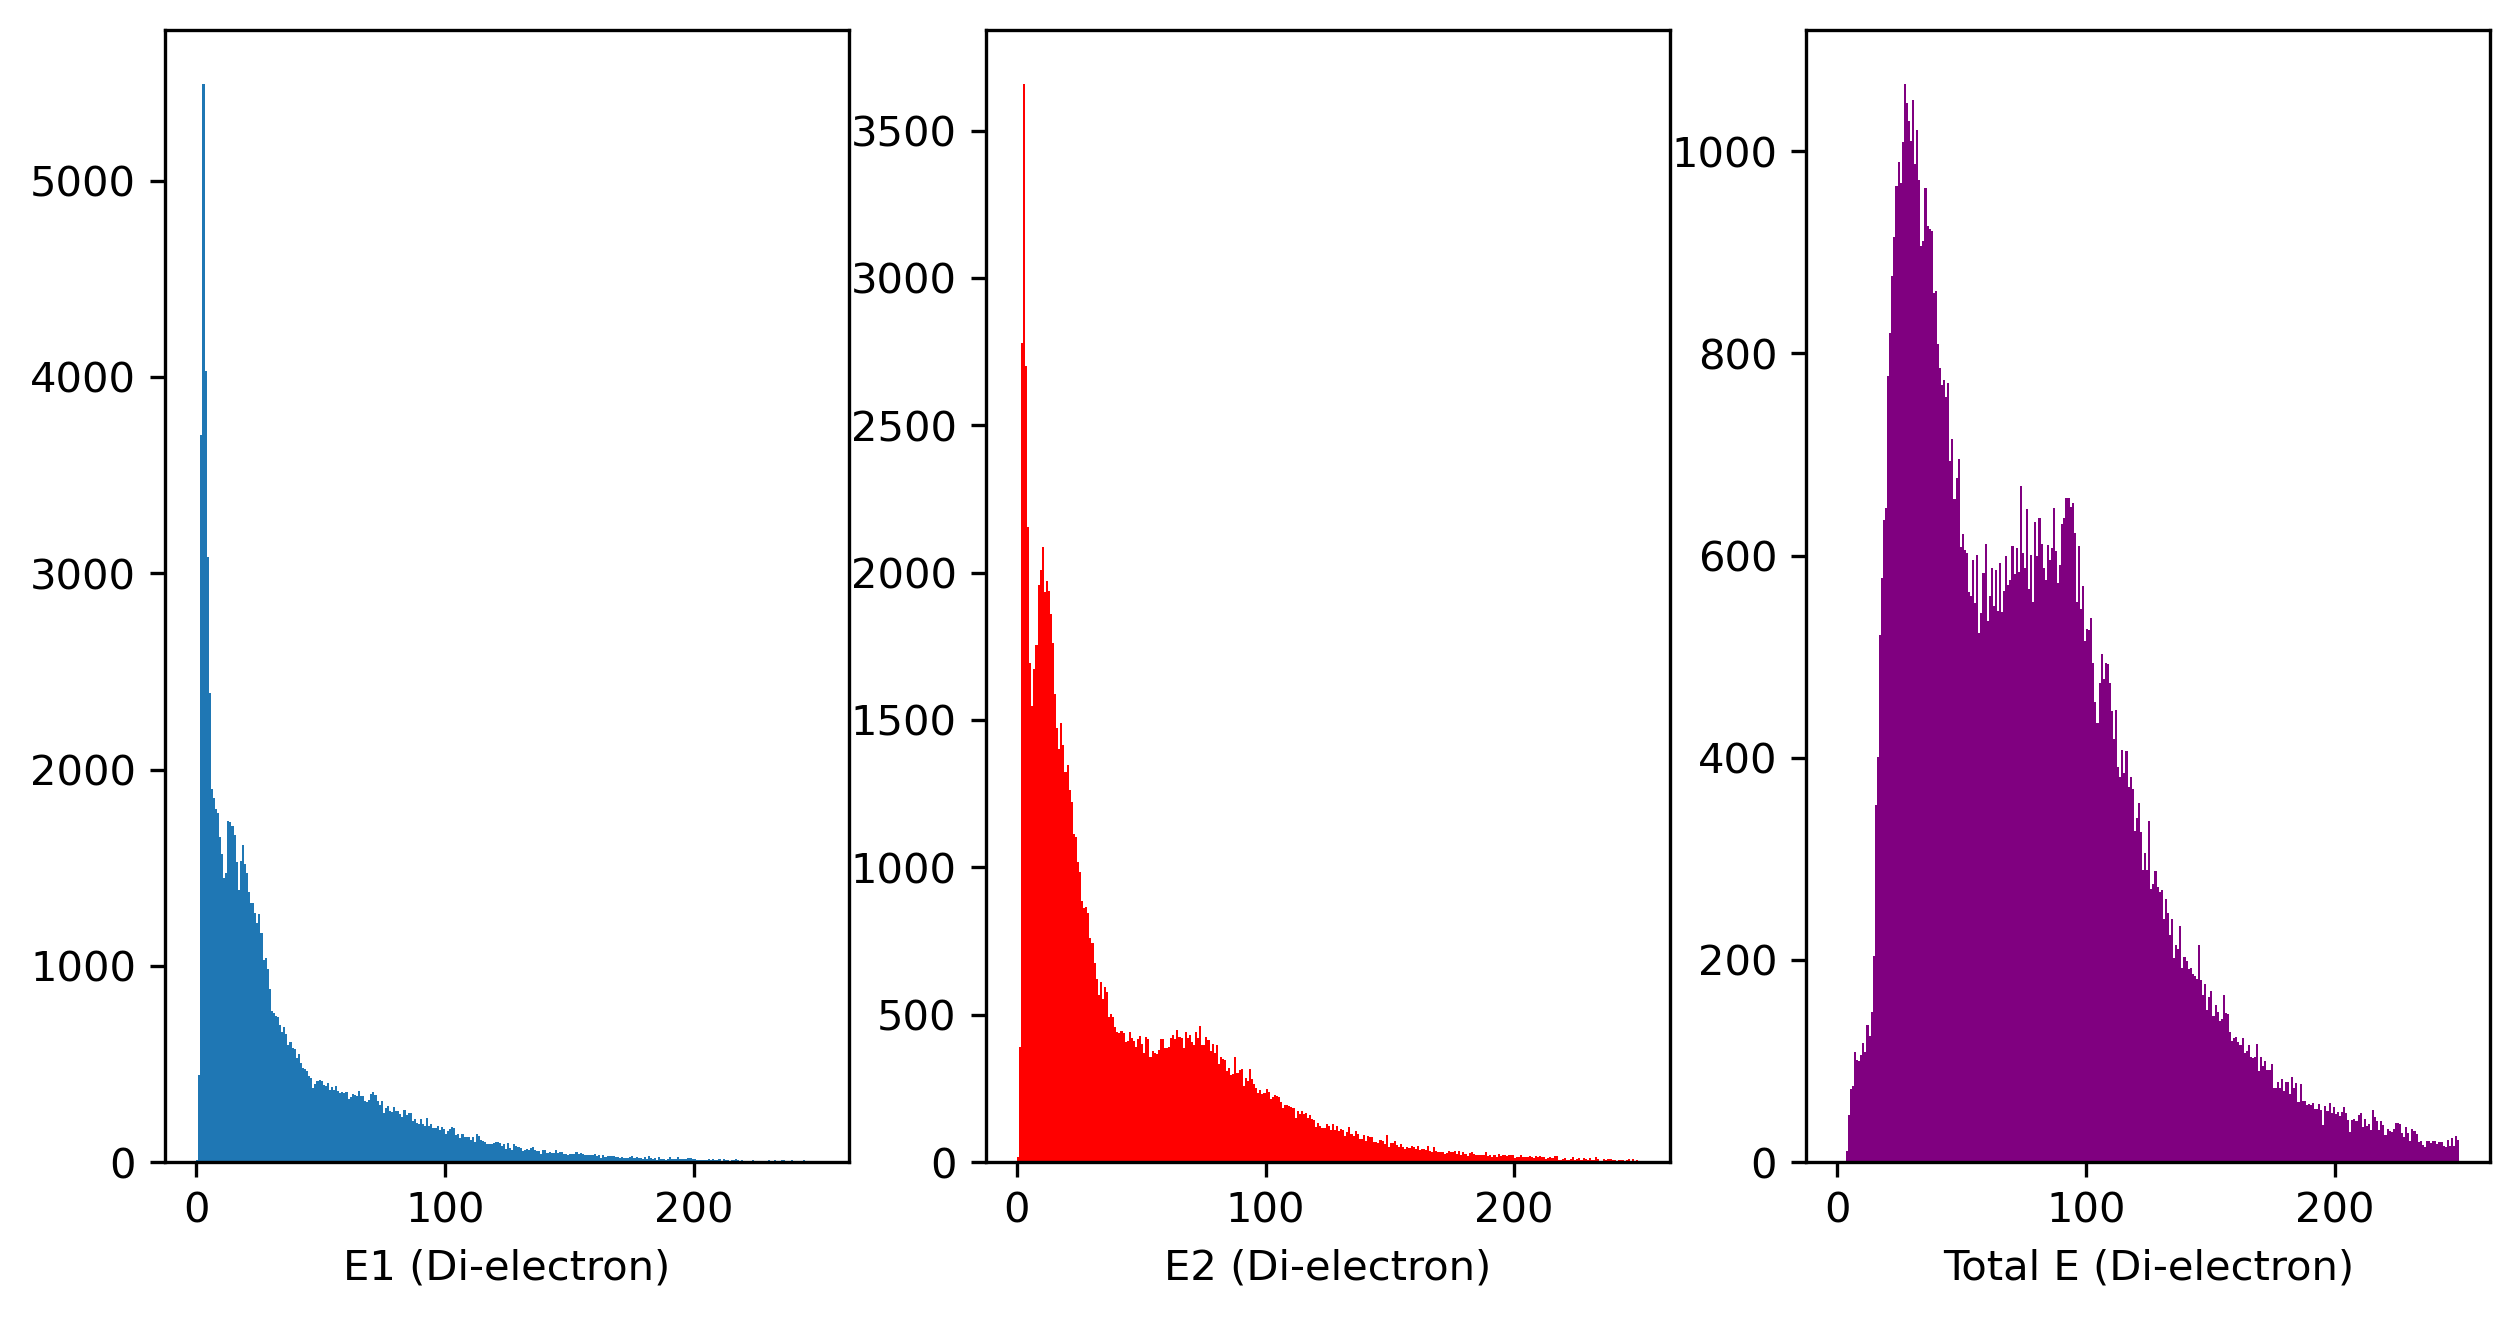

In [160]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300)
bins1 = ax1.hist(E1, bins=300, range=(0,250))
ax1.set_xlabel('E1 (Di-electron)')

bins2 = ax2.hist(E2, bins=300, range=(0,250), color="red")
ax2.set_xlabel('E2 (Di-electron)')

bins3 = ax3.hist(Ei, bins=300, range=(0,250), color="purple")
ax3.set_xlabel('Total E (Di-electron)')

plt.show()
# Plots the energies of each particle along with the total energy

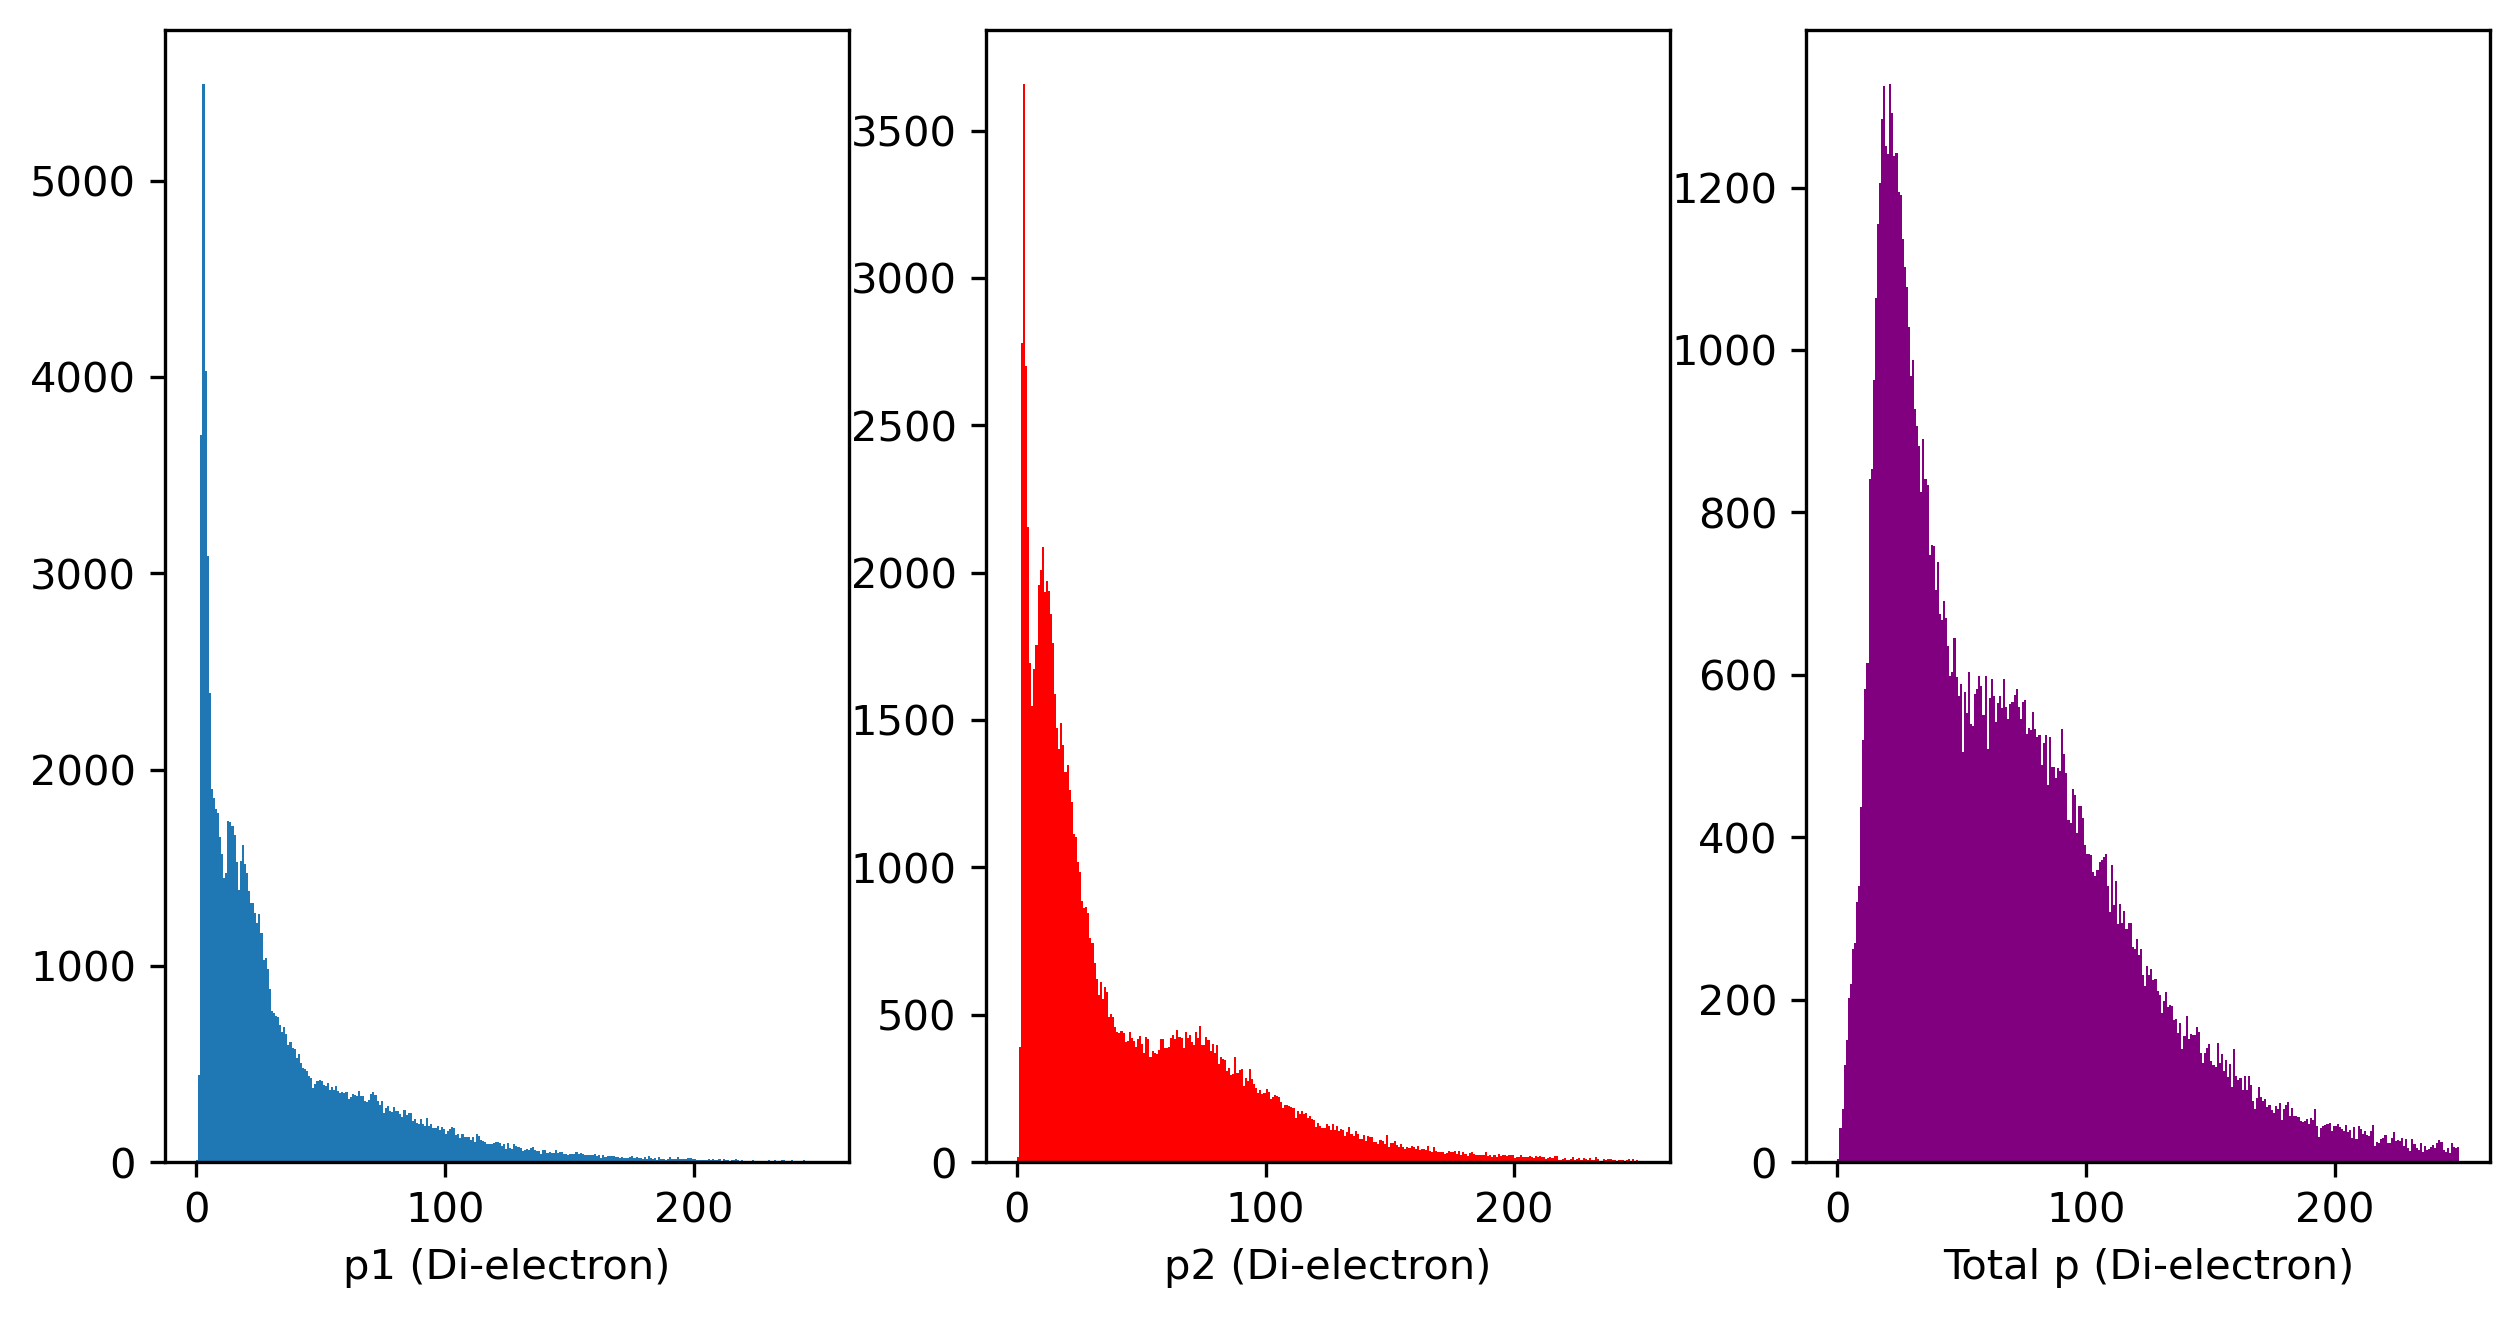

In [161]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300)
bins4 = ax1.hist(p1, bins=300, range=(0,250))
ax1.set_xlabel('p1 (Di-electron)')

bins5 = ax2.hist(p2, bins=300, range=(0,250), color="red")
ax2.set_xlabel('p2 (Di-electron)')

bins6 = ax3.hist(pi, bins=300, range=(0,250), color="purple")
ax3.set_xlabel('Total p (Di-electron)')
# plots both the particles momentums along with the total momentum of both particles
plt.show()

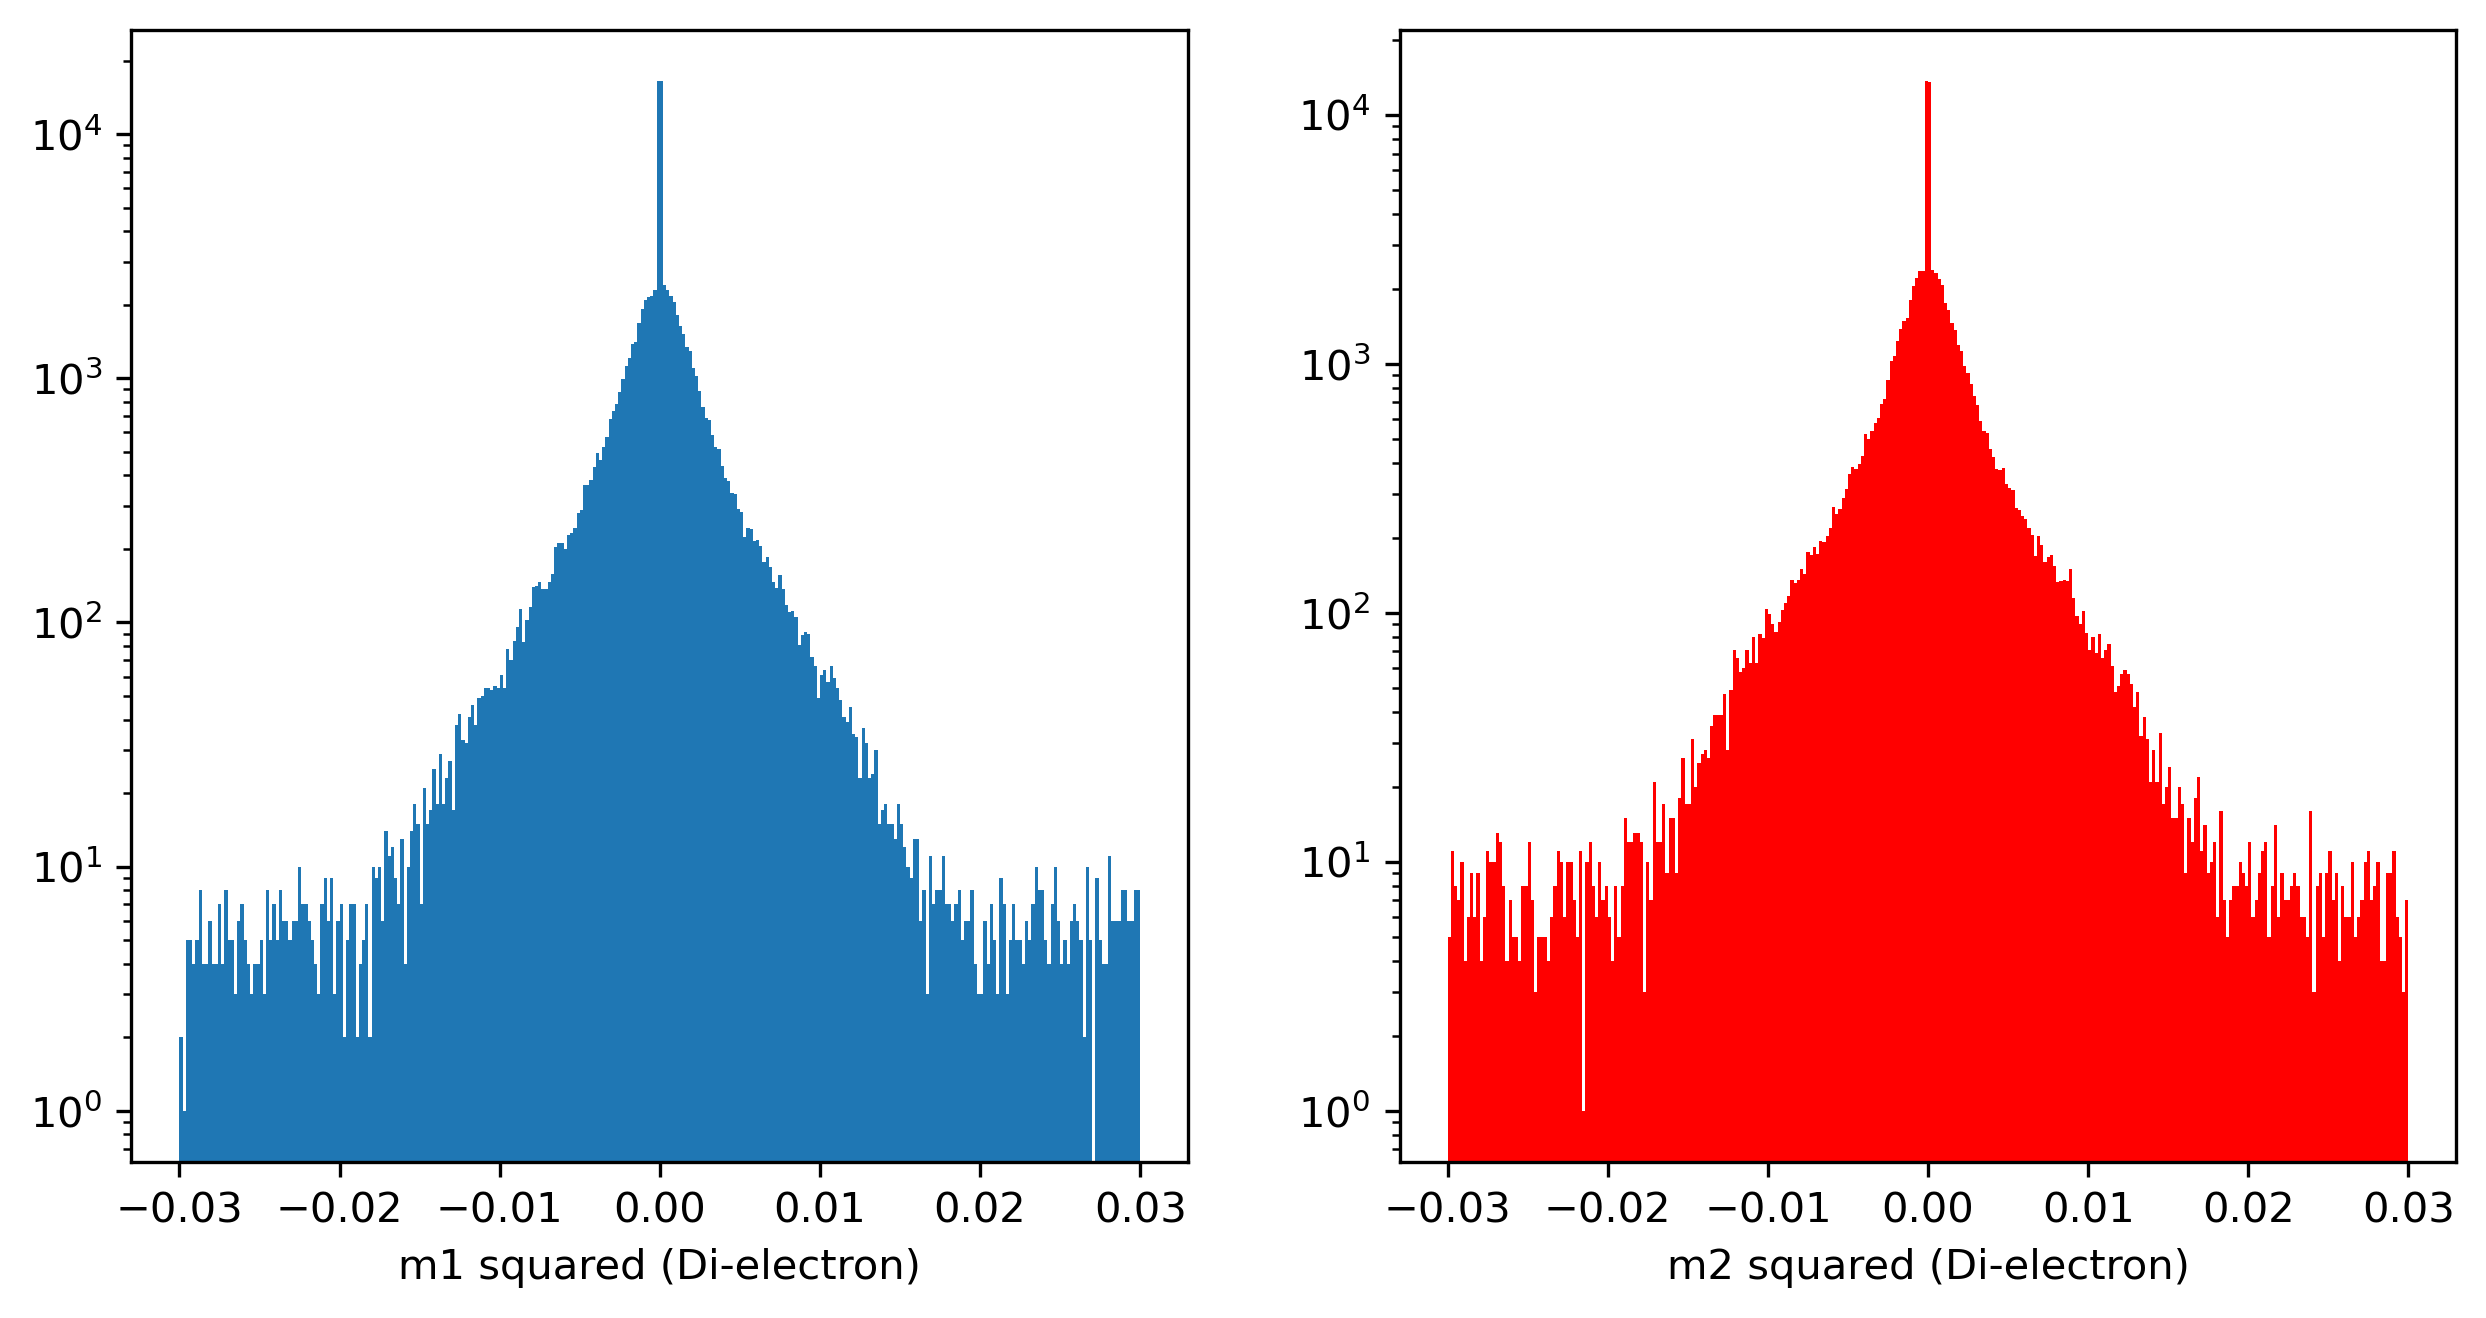

In [11]:
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=300)
bins7 = ax1.hist(m1_sq, bins=300, range=(-.03, .03))
ax1.set_xlabel('m1 squared (Di-electron)')
ax1.semilogy()


bins8 = ax2.hist(m2_sq, bins=300, range=(-.03,.03), color="red")
ax2.set_xlabel('m2 squared (Di-electron)')
ax2.semilogy()

plt.show()
# plots the masses of each particle on a logarithmic axis in order to determine rough particle mass

Looking at the squared masses, it can be seen that the masses recorded for the particles in this data set are incredibly small such that they are almost 0. We know this is the case for the electron (and therefore positron) which has a mass of ~.00051 GeV. When that mass is squared a value of 2.6e-7 results. Quarks also have distinctively small masses, but we know that free quarks cannot exist so this being quarks is not possible. It can be safe to assume that, since the peaks are so close to 0, these particles are in fact electrons and positrons. 

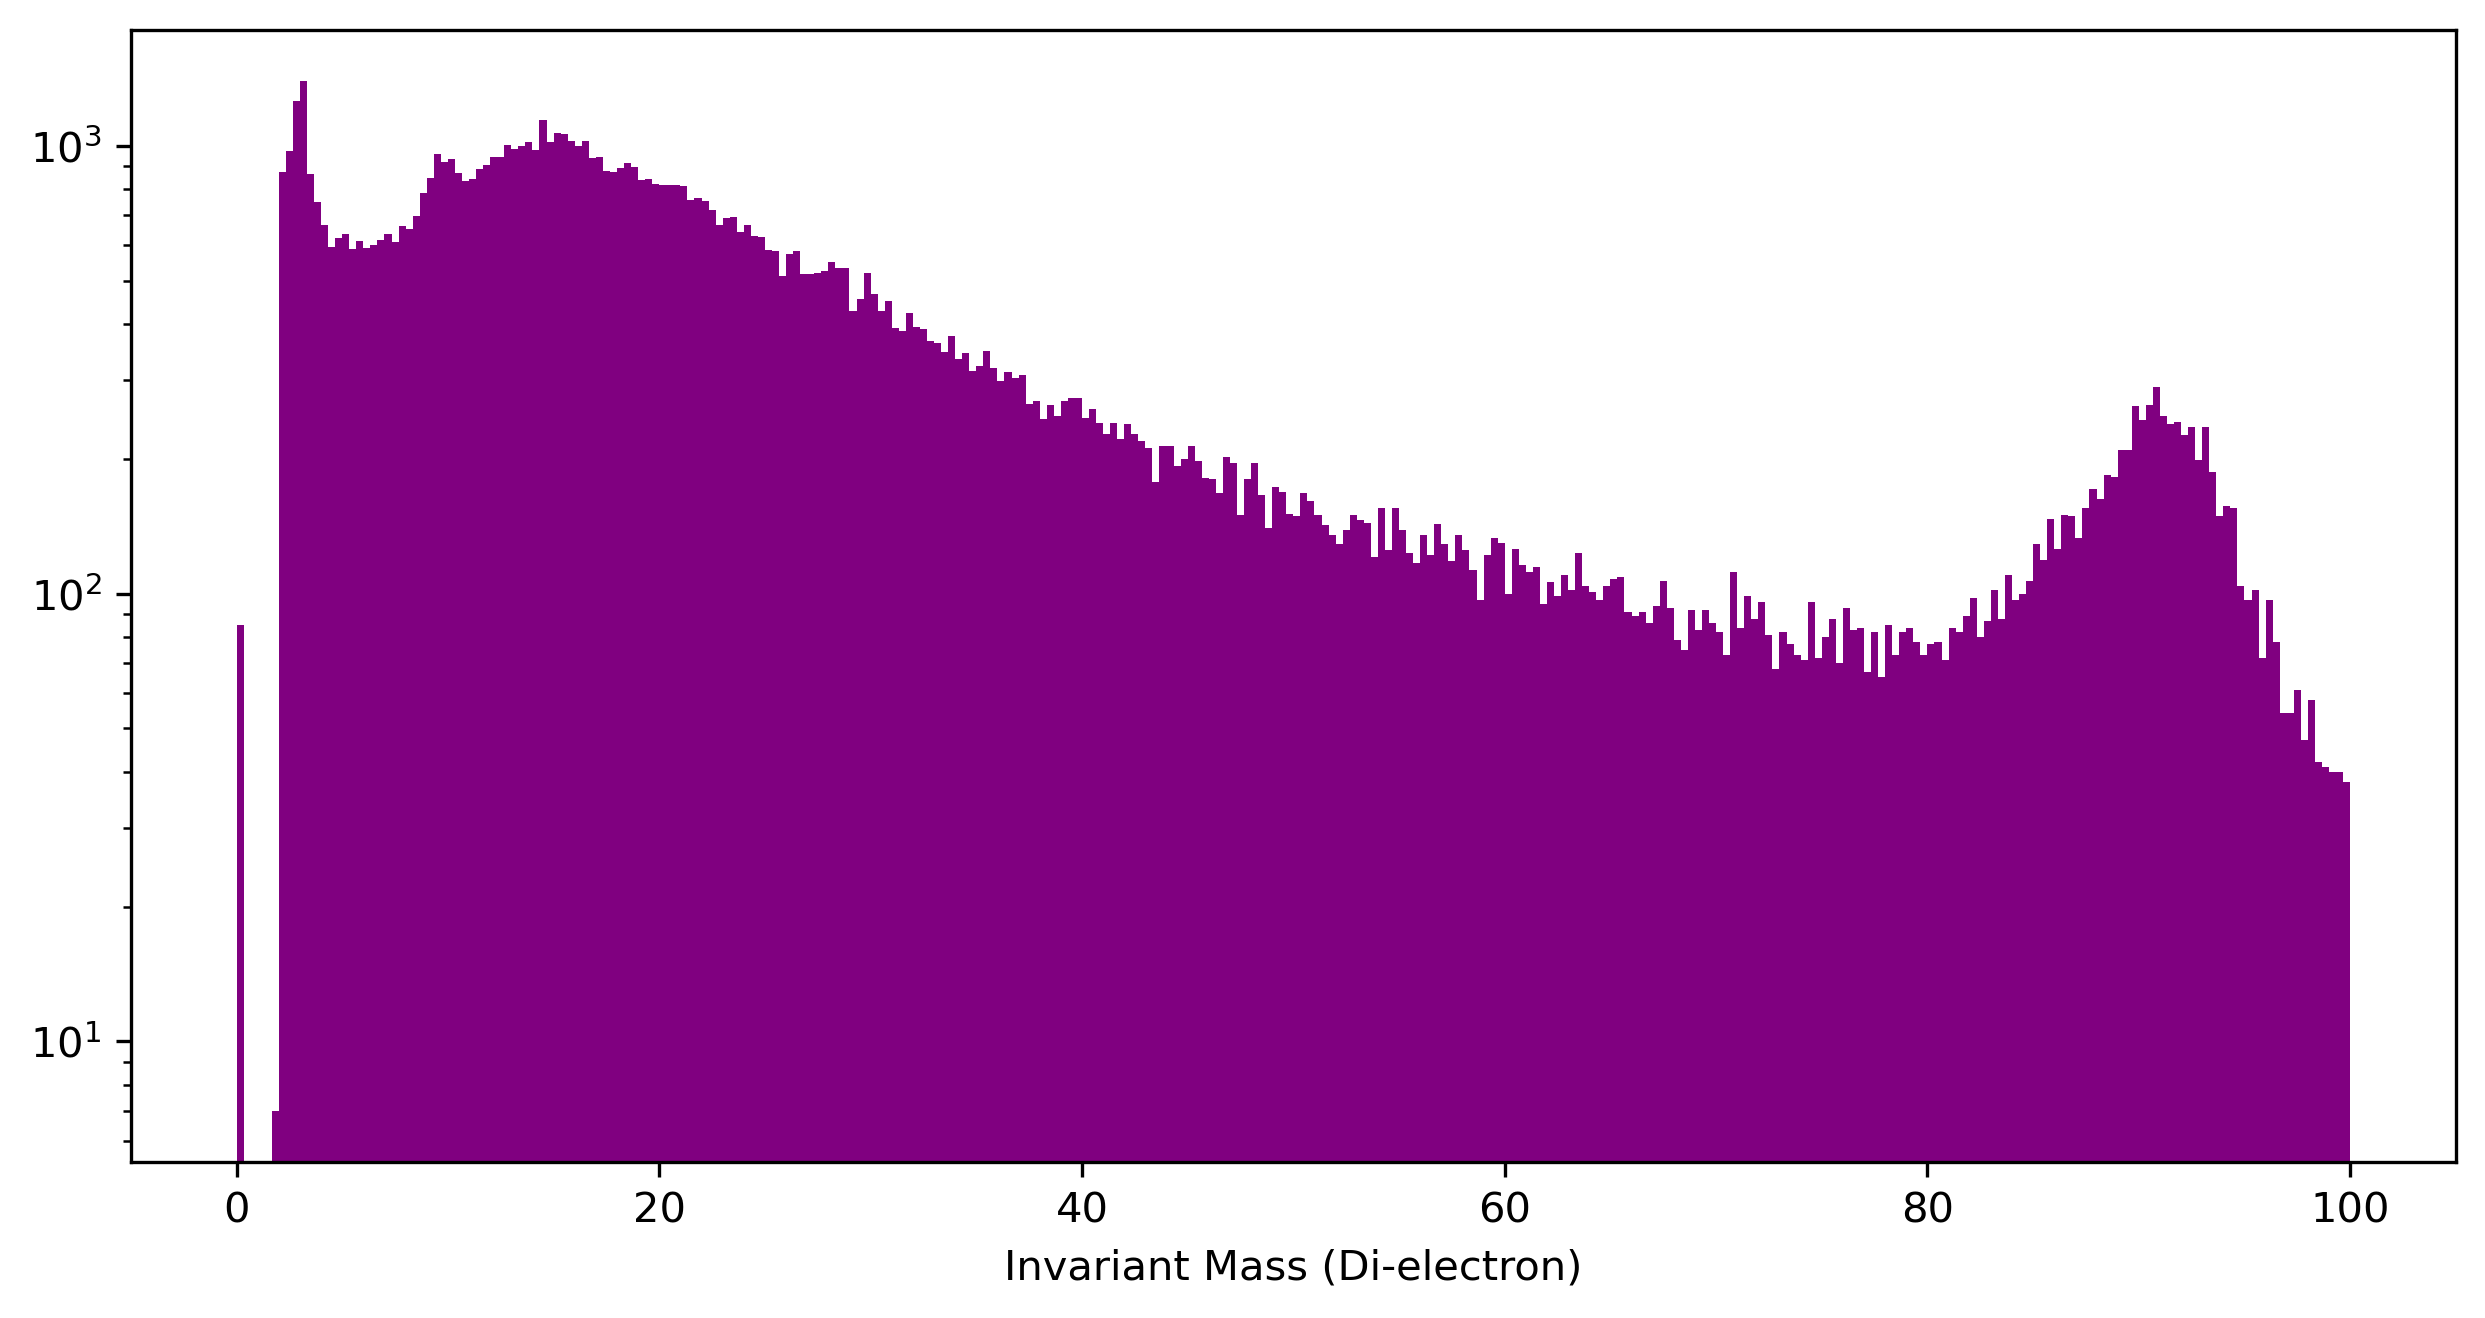

In [178]:
fig4, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

bins_mp1 = ax1.hist(mp, bins=300, range=(0, 100), color="purple")
ax1.set_xlabel('Invariant Mass (Di-electron)')
ax1.semilogy()

plt.show()
# plots entire range of data on a logarithmic scale
# peaks visible at ~3, 10, 90 GeV

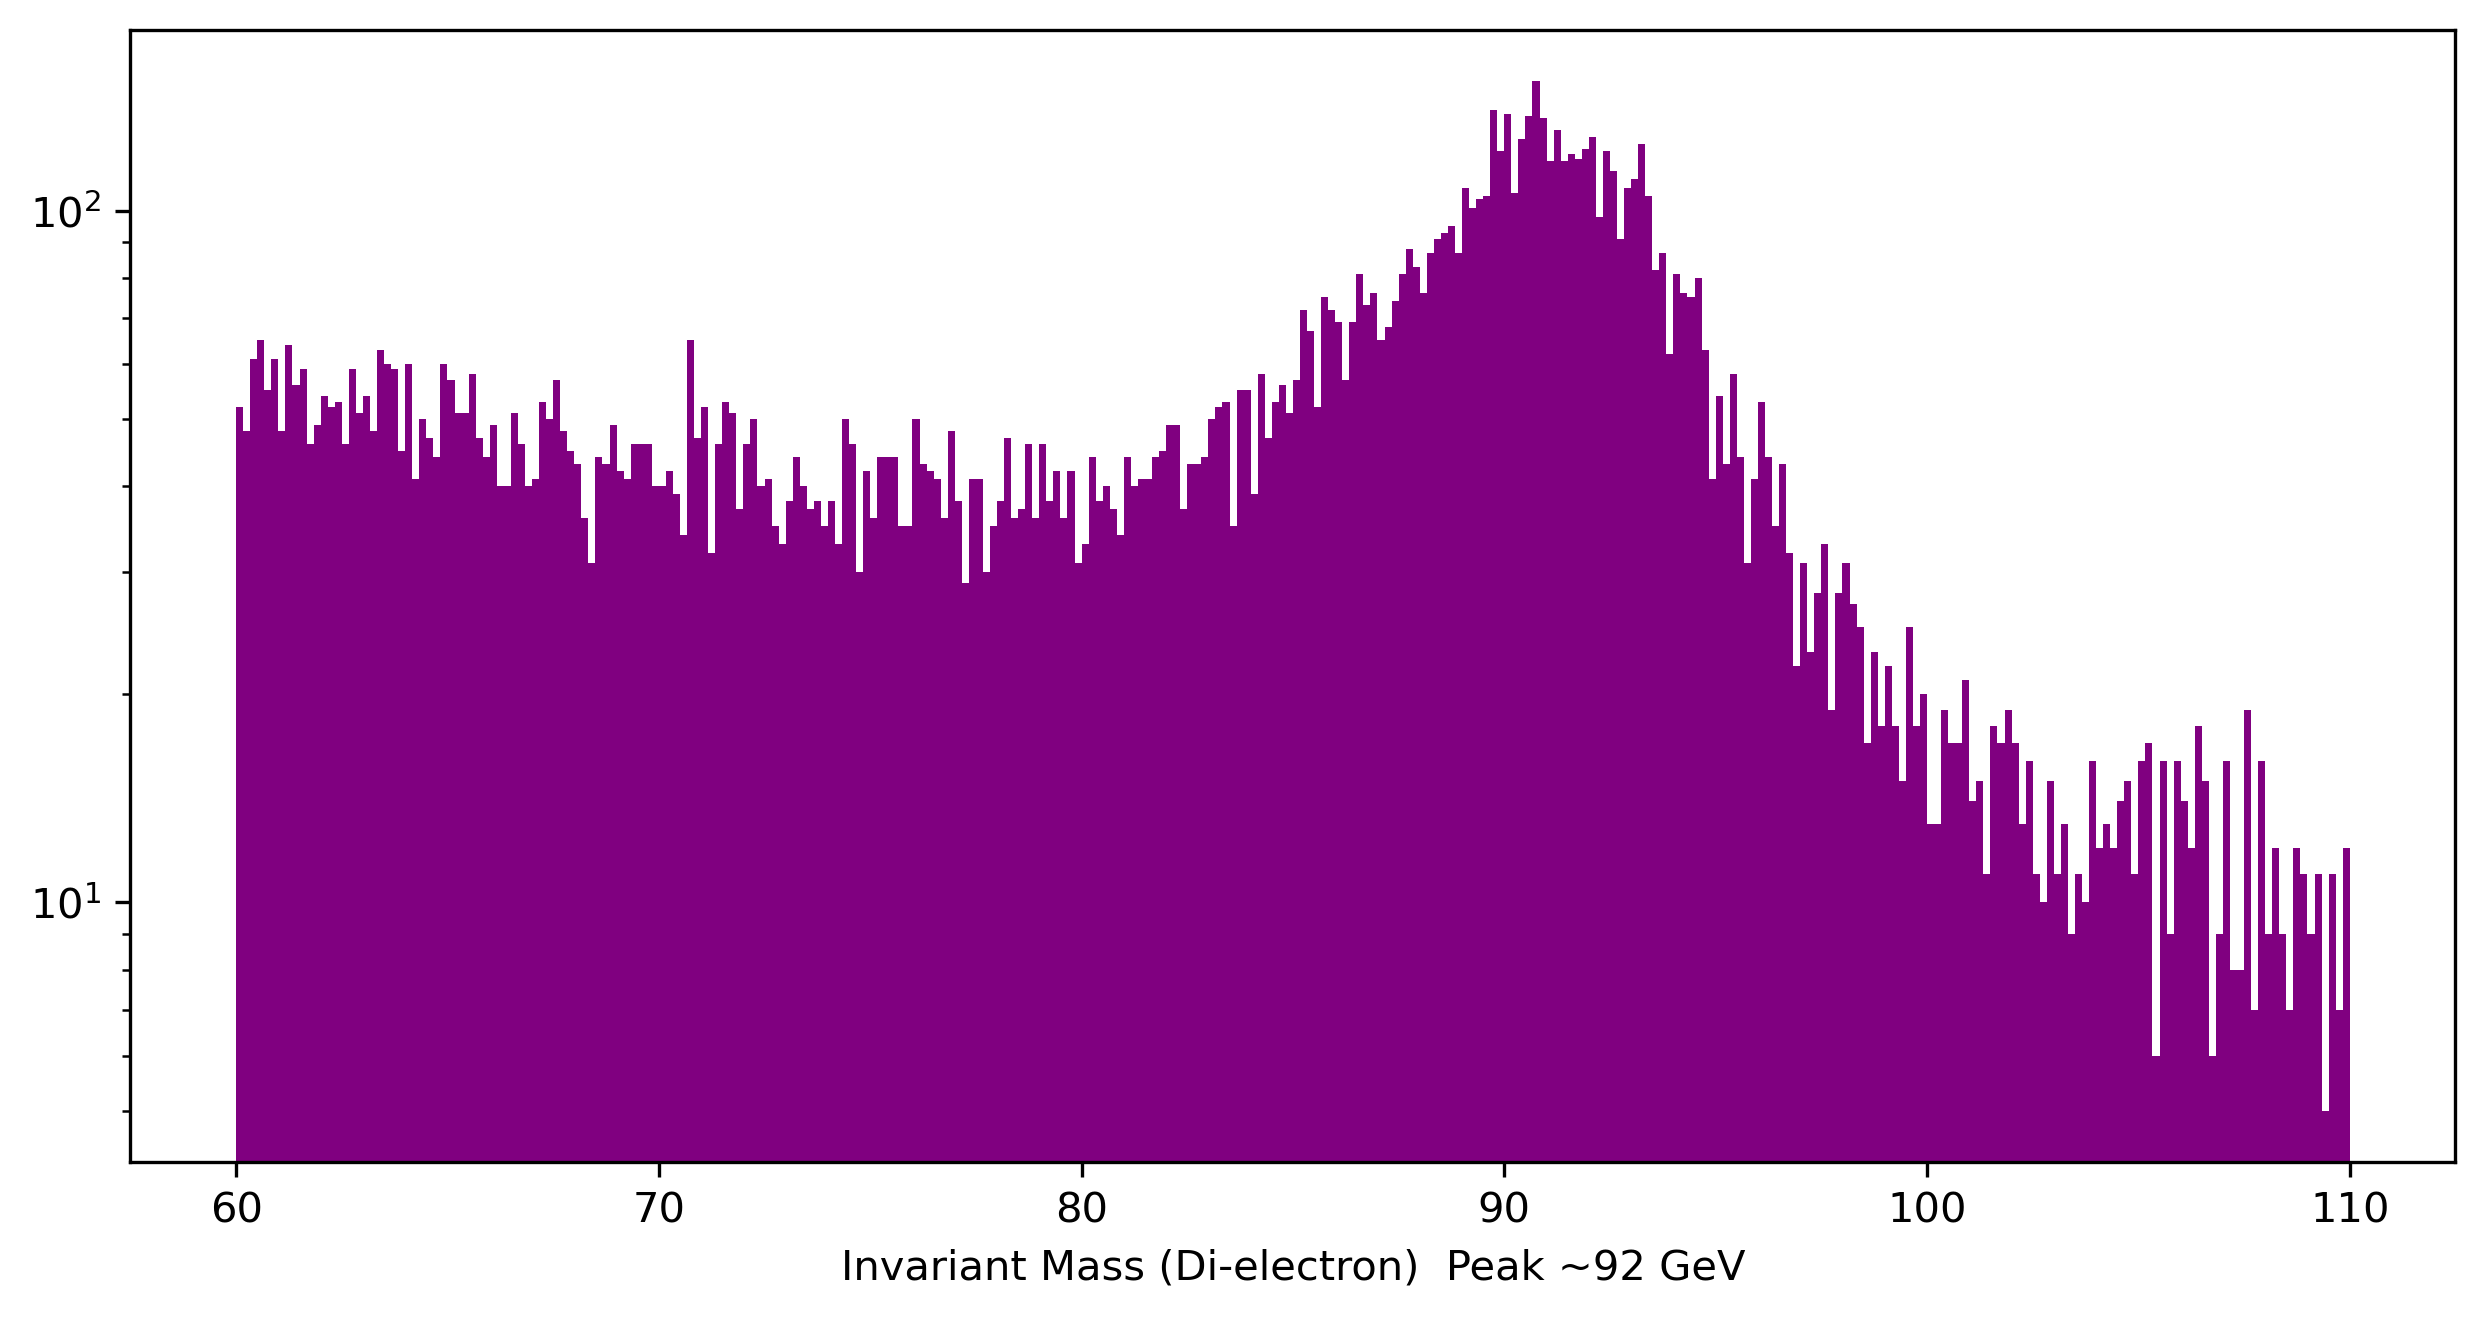

In [13]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

bins_mp2 = ax1.hist(mp, bins=300, range=(60, 110), color="purple")
ax1.set_xlabel('Invariant Mass (Di-electron)  Peak ~92 GeV')
ax1.semilogy()

plt.show()
# focused plot on the first peak at ~92 GeV

A, Mu, Sigma, Noise Coefficients: [ 97.72338794  90.84152899   3.08313005  -0.96751277 114.34829358]
Errors: [2.01574137 0.07083872 0.08289291 0.0701219  5.76971674]


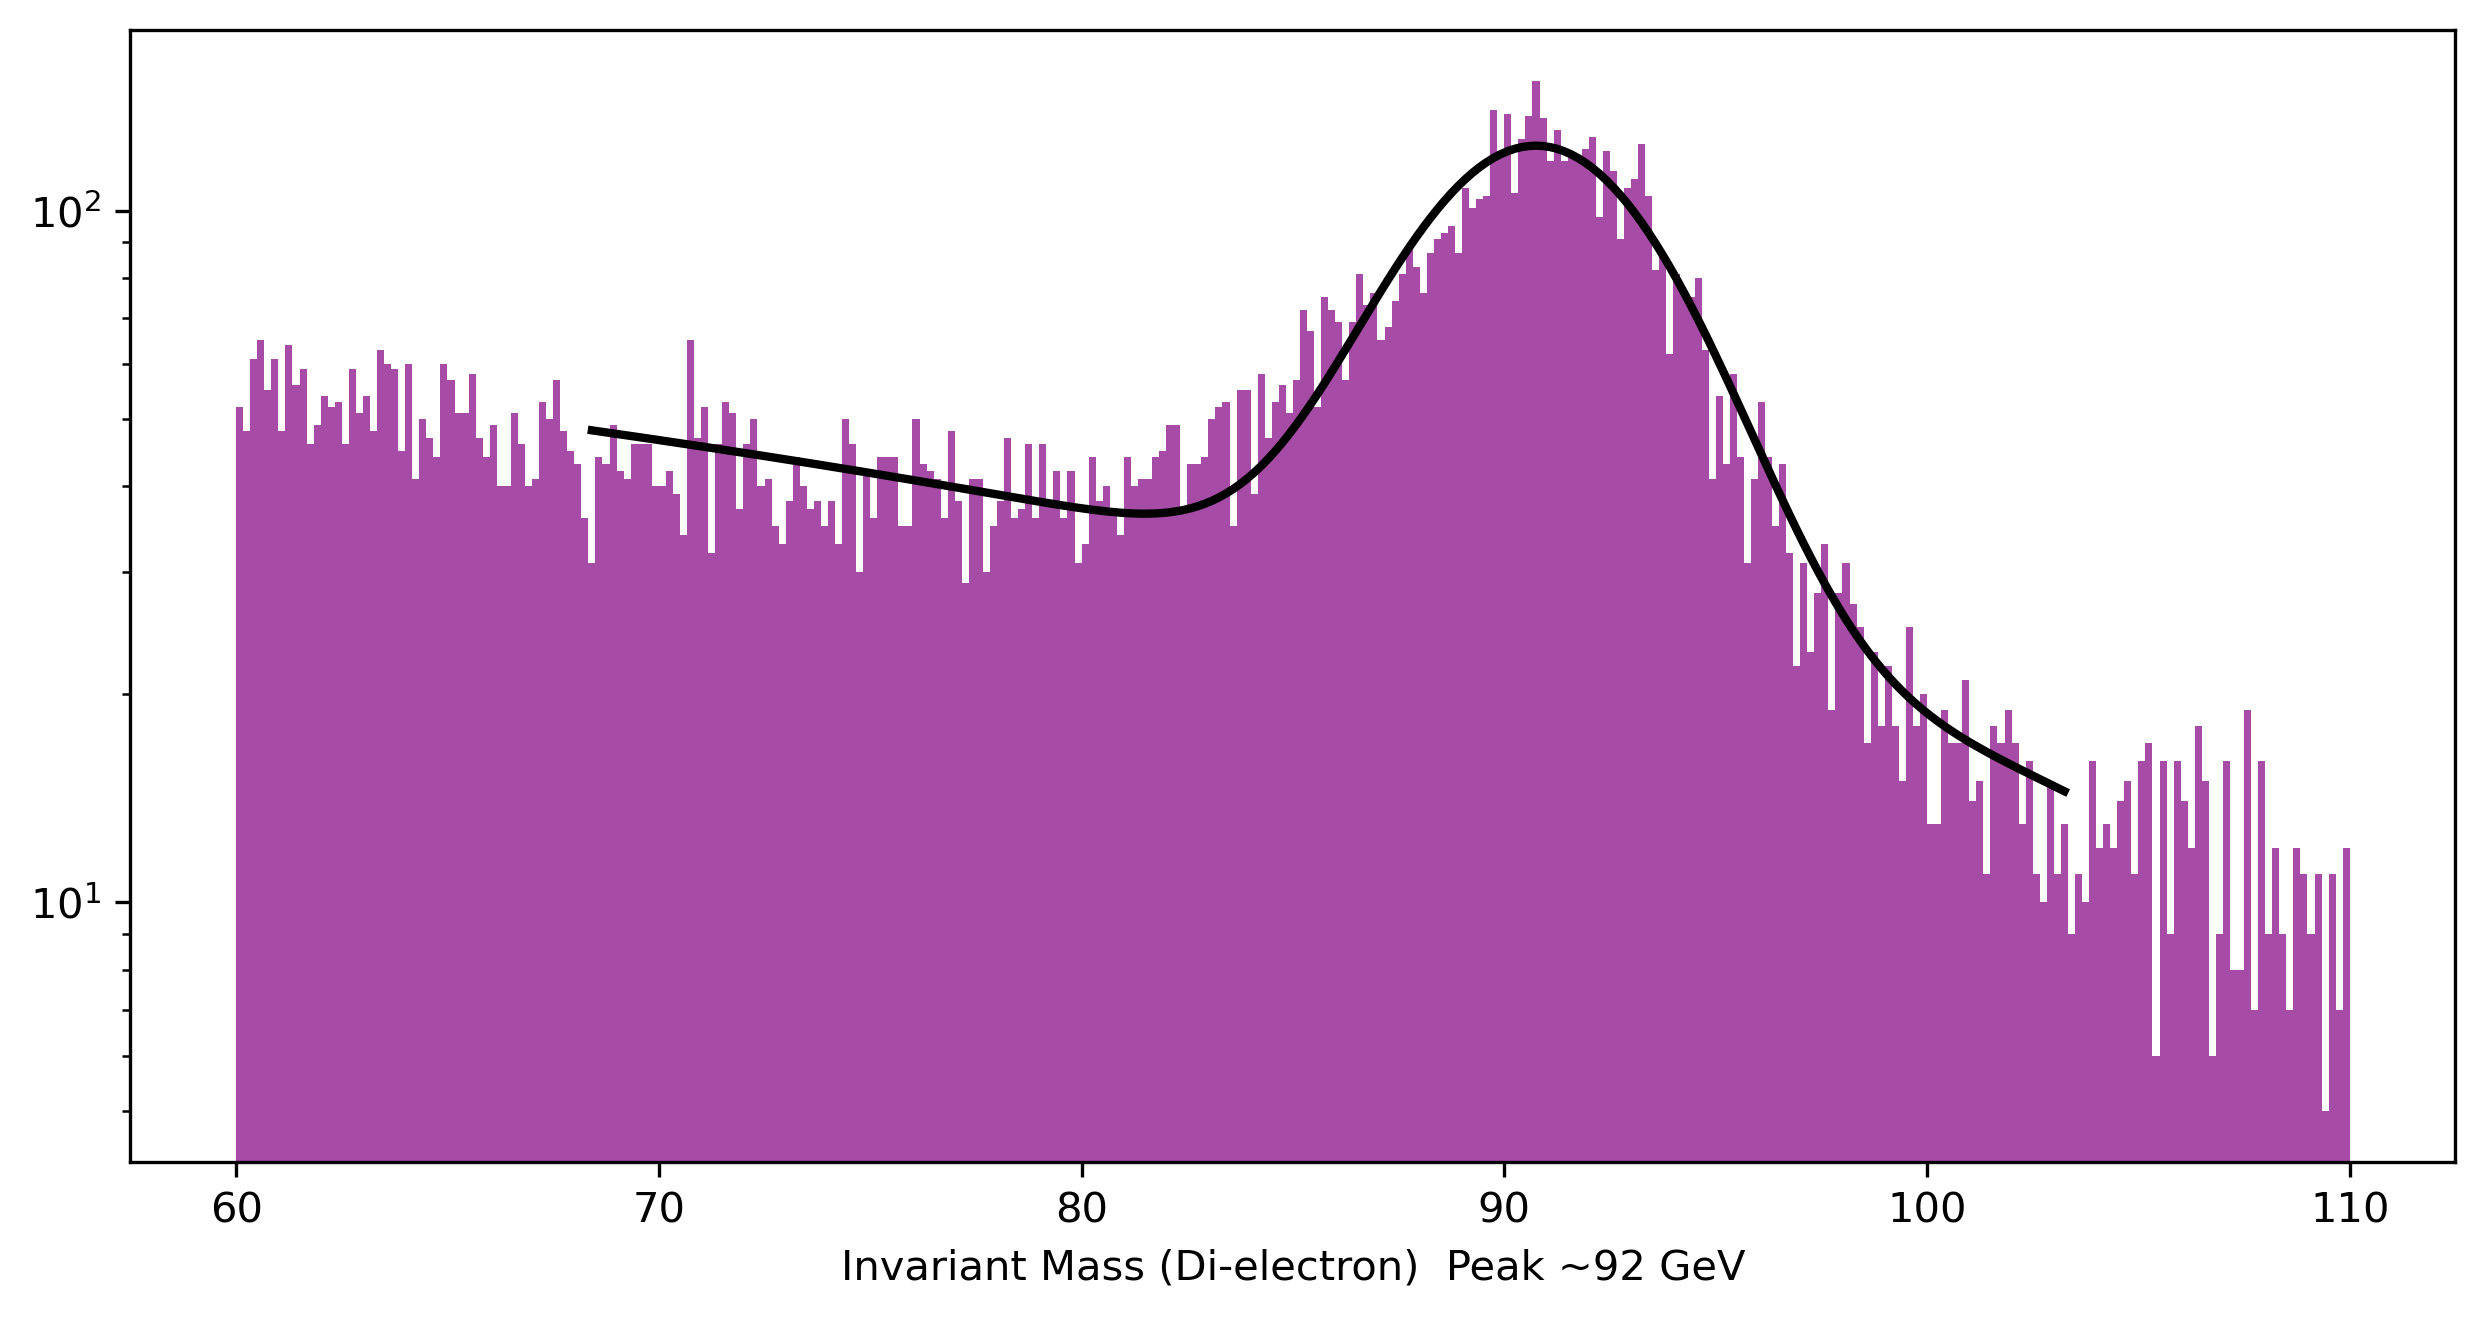

In [176]:
from scipy.optimize import curve_fit

bin_occupancies = bins_mp2[0]
bin_centers = []

for i in range(len(bin_occupancies)):
    bin_centers.append(0.5 * (bins_mp2[1][i+0] + bins_mp2[1][i+1]))
    

def gauss_noise1(x, A, mu, sigma, c, d):
    return A*np.exp(-(x - mu)**2 / 2 / sigma**2) + (c*x + d)
# define function that accounts for the signal's functional form (gaussian) and the noise's functional form (linear)

bin_centers2 = np.array(bin_centers[50:260])
bin_occupancies2 = bin_occupancies[50:260]
# selects desired range of bins to fit the function over

popt, pcov = curve_fit(gauss_noise1, bin_centers2, bin_occupancies2, p0 = [150, 95, 2, -1.3, 100])

print("A, Mu, Sigma, Noise Coefficients:", popt)
error = np.sqrt(np.diag(pcov))
print("Errors:", error)
# prints out optimal fit values along with the covariances

fit_vals1 = gauss_noise1(bin_centers2, popt[0], popt[1], popt[2], popt[3], popt[4])

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.hist(mp, bins=300, range=(60,110), color="purple", alpha = .7)
plt.xlabel('Invariant Mass (Di-electron)  Peak ~92 GeV')
ax1.semilogy()
ax1.plot(bin_centers2,fit_vals1, "k-", linewidth=2)
plt.show()
# plots the optimized fit function over the selected data range

The fitted gaussian provides a mean invariant mass of 90.8415 GeV. Comparing this to known particles, it can be seen that the Z boson has a similar mass of 91.1876 GeV and a decay mode into an electron/positron pair. This leads me to believe that for this peak, the parent particle was a Z boson.

https://pdglive.lbl.gov/Particle.action?node=S044&home=

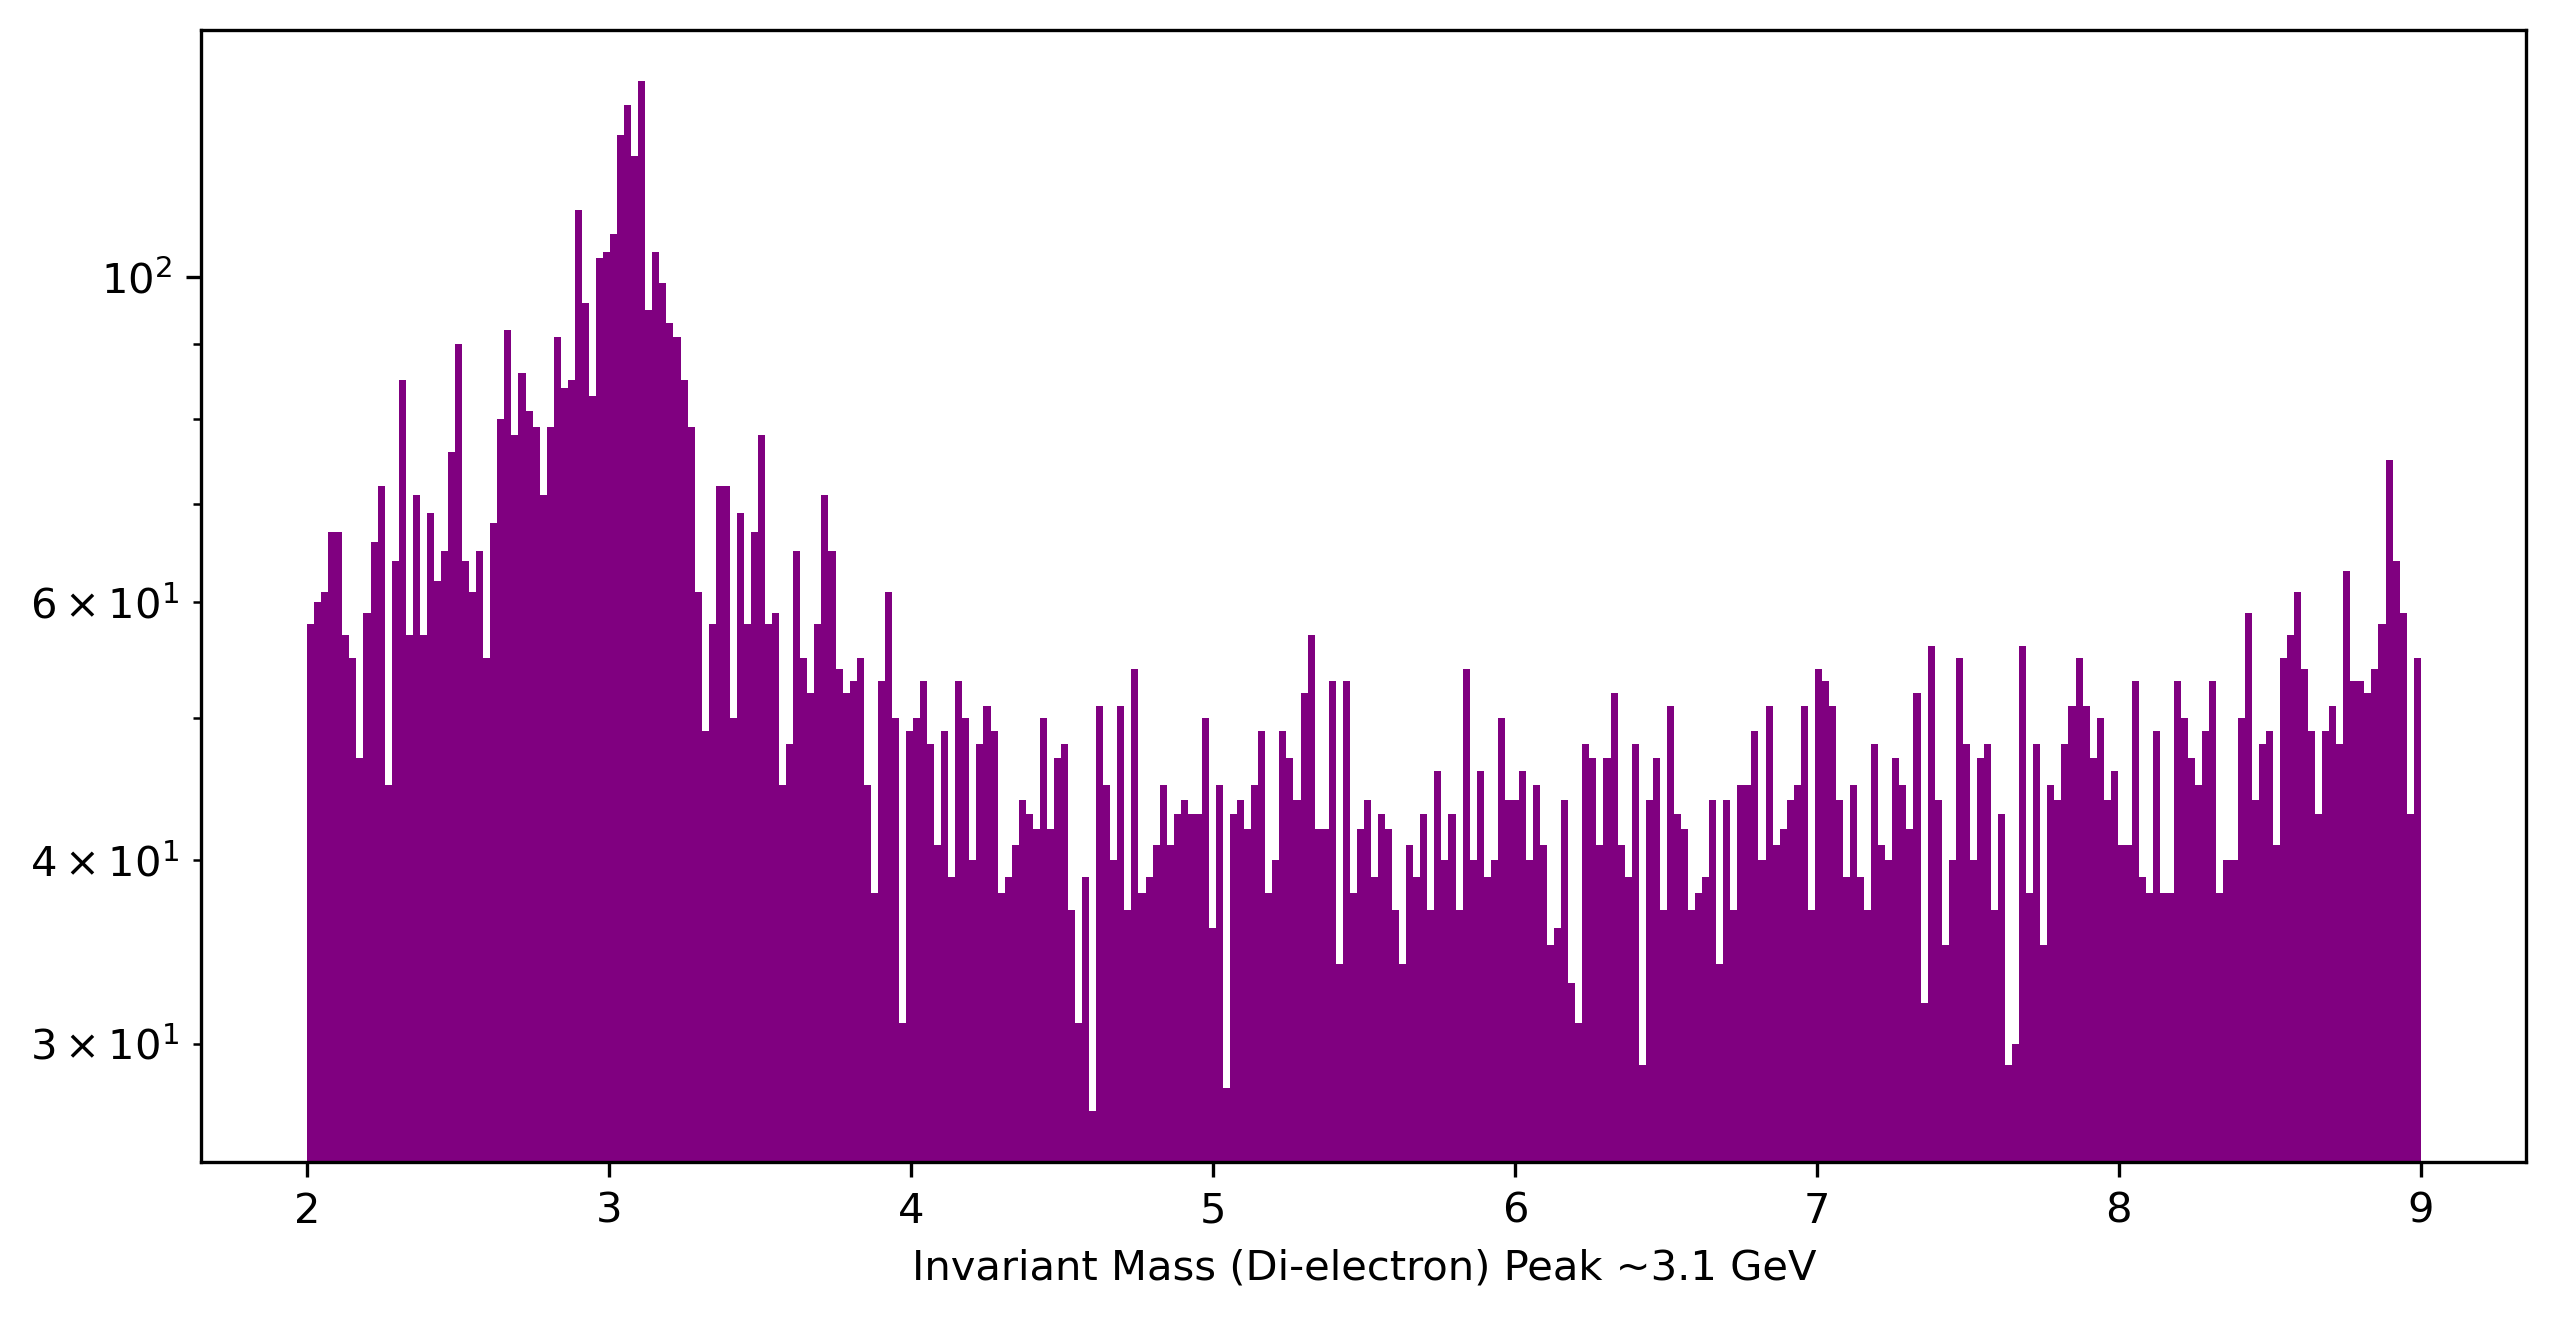

In [15]:
fig4, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

bins_mp3 = ax1.hist(mp, bins=300, range=(2, 9), color="purple")
ax1.set_xlabel('Invariant Mass (Di-electron) Peak ~3.1 GeV')
ax1.semilogy()

plt.show()

A, Mu, Sigma, Noise Coefficients [56.18190242  3.0452359   0.17941423 -1.28300242 -7.9548687  41.13452575]
Errors: [3.13385078 0.01129867 0.01246416 0.25354916 0.55006585 2.73889379]


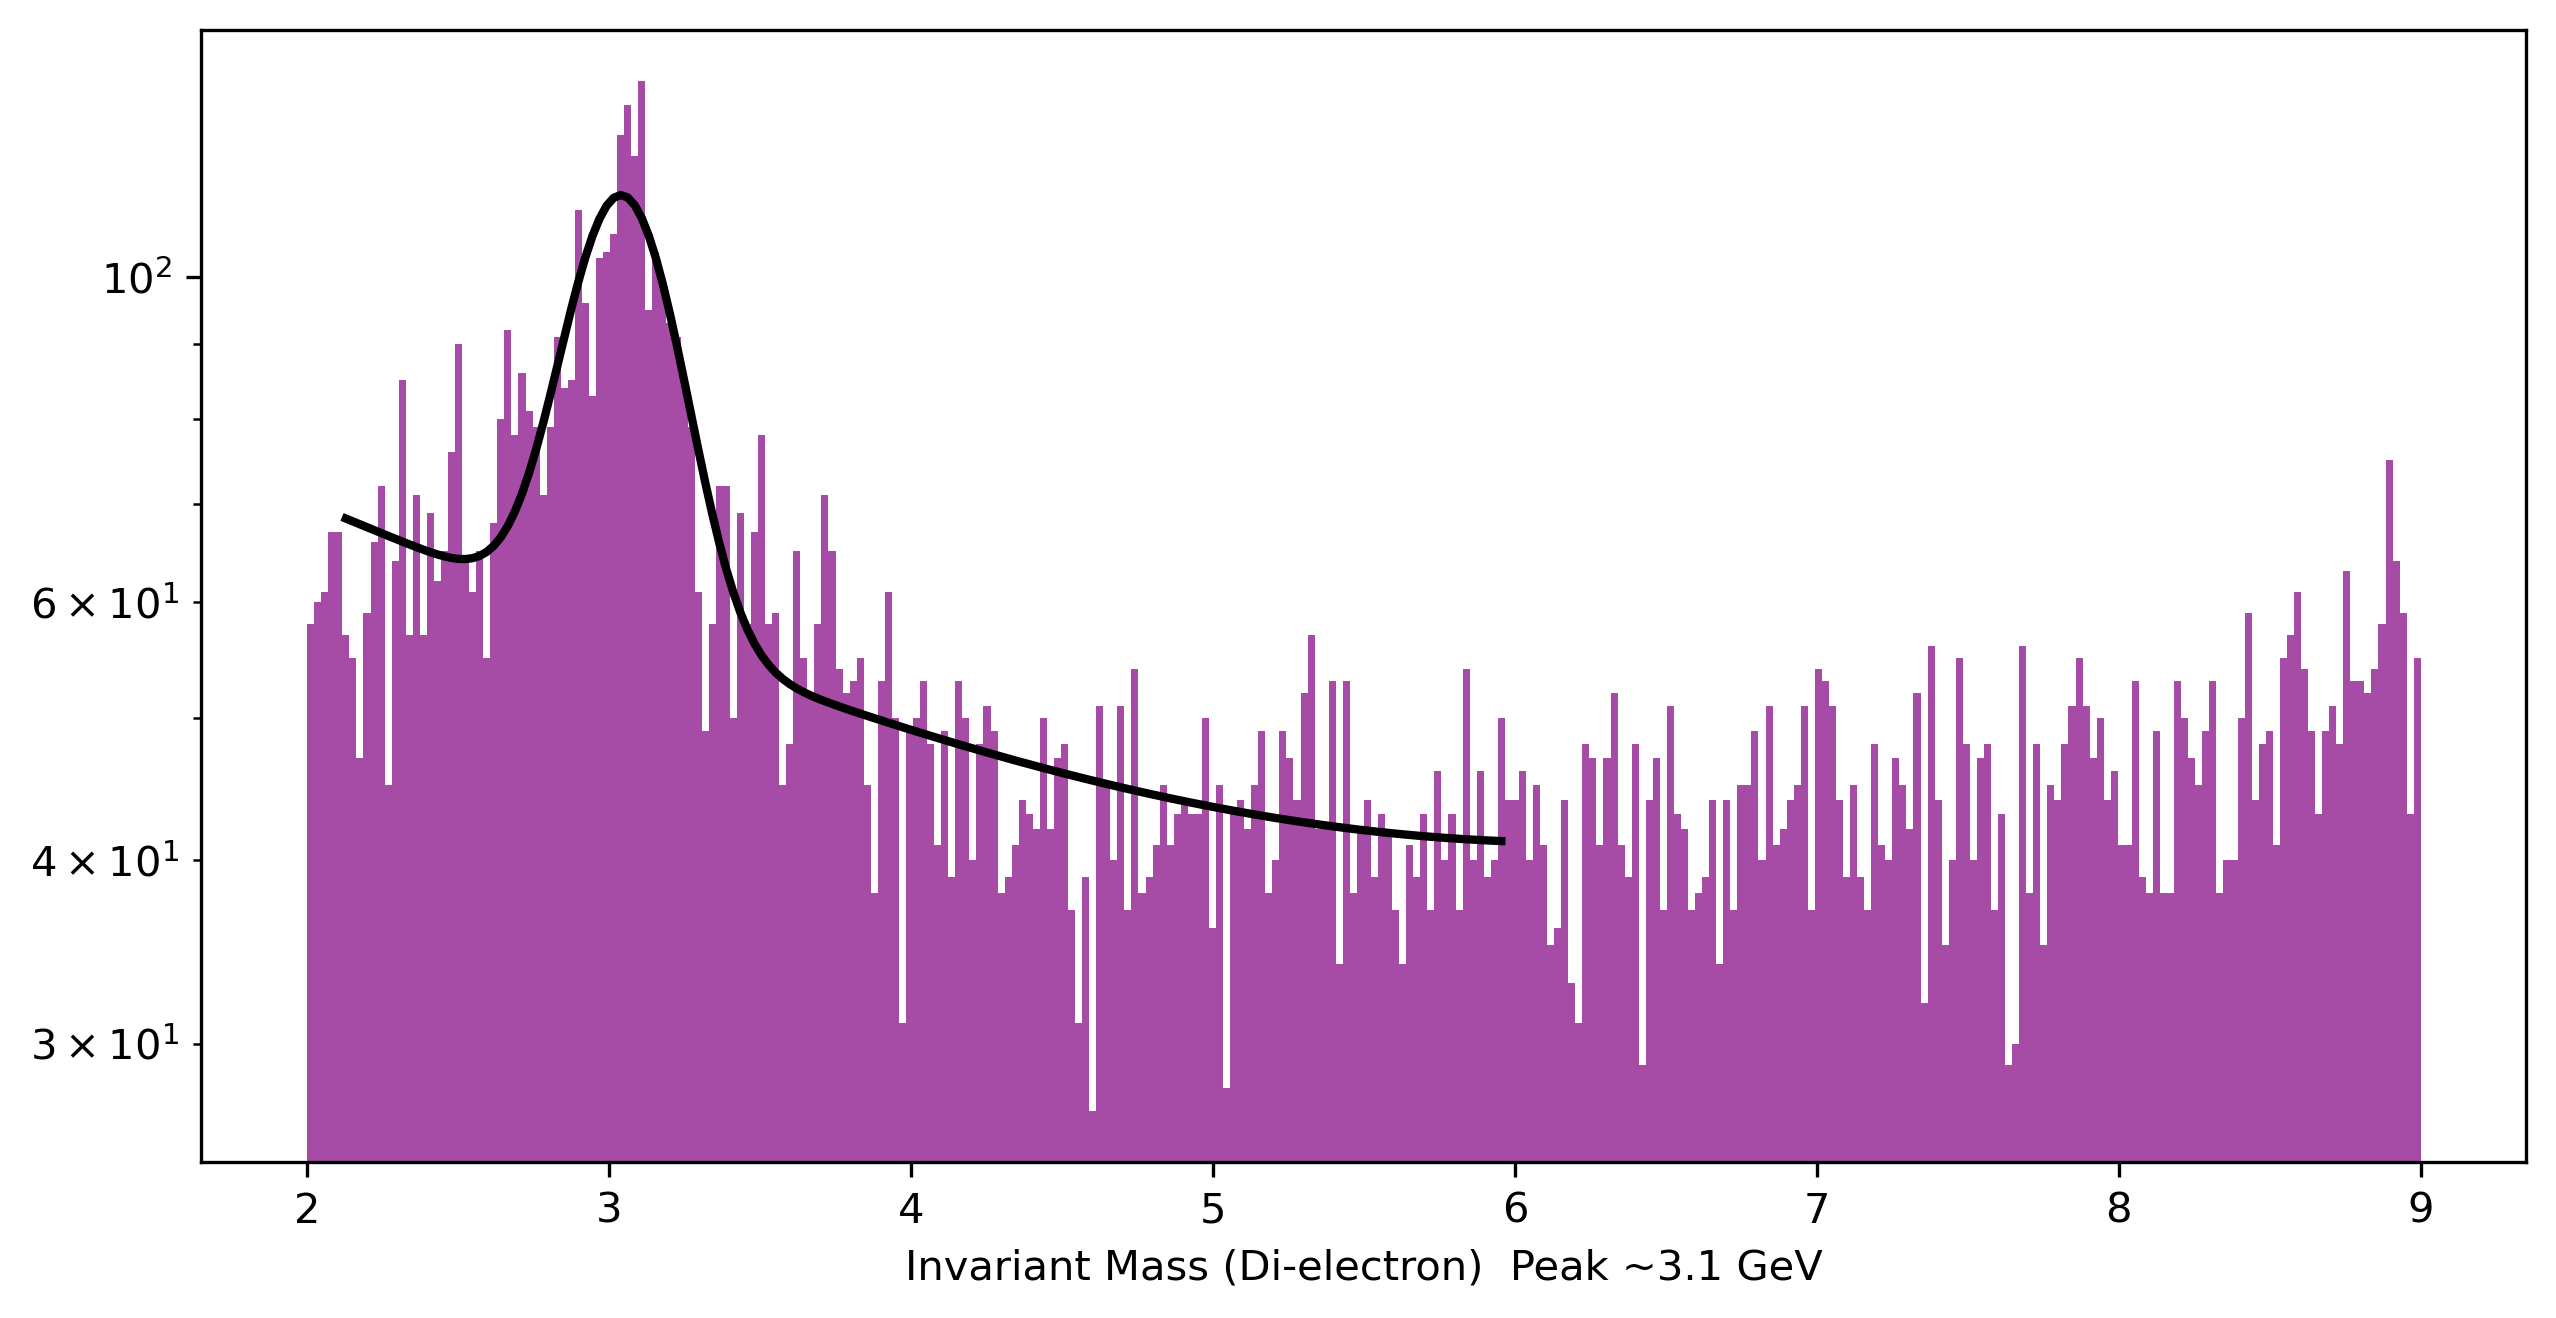

In [173]:
from scipy.optimize import curve_fit

bin_occupancies = bins_mp3[0]
bin_centers = []

for i in range(len(bin_occupancies)):
    bin_centers.append(0.5 * (bins_mp3[1][i+0] + bins_mp3[1][i+1]))
    

def gauss_noise2(x, A, mu, sigma, c, d, e):
    return A*np.exp(-(x - mu)**2 / 2 / sigma**2) + ((c*x - d)**2 + e)
# define function that accounts for the signal's functional form (gaussian) and the noise's functional form (shifted and stretched 2nd order polynomial)

bin_centers2 = np.array(bin_centers[5:170])
bin_occupancies2 = bin_occupancies[5:170]

popt, pcov = curve_fit(gauss_noise2, bin_centers2, bin_occupancies2, p0 = [50, 3.2, .5, .5, 2, 40])

print("A, Mu, Sigma, Noise Coefficients", popt)
error = np.sqrt(np.diag(pcov))
print("Errors:", error)

fit_vals2 = gauss_noise2(bin_centers2, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.hist(mp, bins=300, range=(2,9), color="purple", alpha = .7)
plt.xlabel('Invariant Mass (Di-electron)  Peak ~3.1 GeV')
ax1.semilogy()
ax1.plot(bin_centers2,fit_vals2, "k-", linewidth=2)
plt.show()

The fitted gaussian provides a mean invariant mass of 3.0452 GeV. Comparing this to the masses of known particles, it can be seen that the electron and positron pairs for this peak came from a particle known as the J/psi meson (bound state of charm and anti-charm quarks). The mass of this particle is listed as 3.0969 GeV on pdg with an electron/positron pair being one of the possible decay modes. All of this points to the fact that the parent particle shown by this peak is the J/psi particle.

https://pdglive.lbl.gov/Particle.action?init=0&node=M070&home=MXXX025

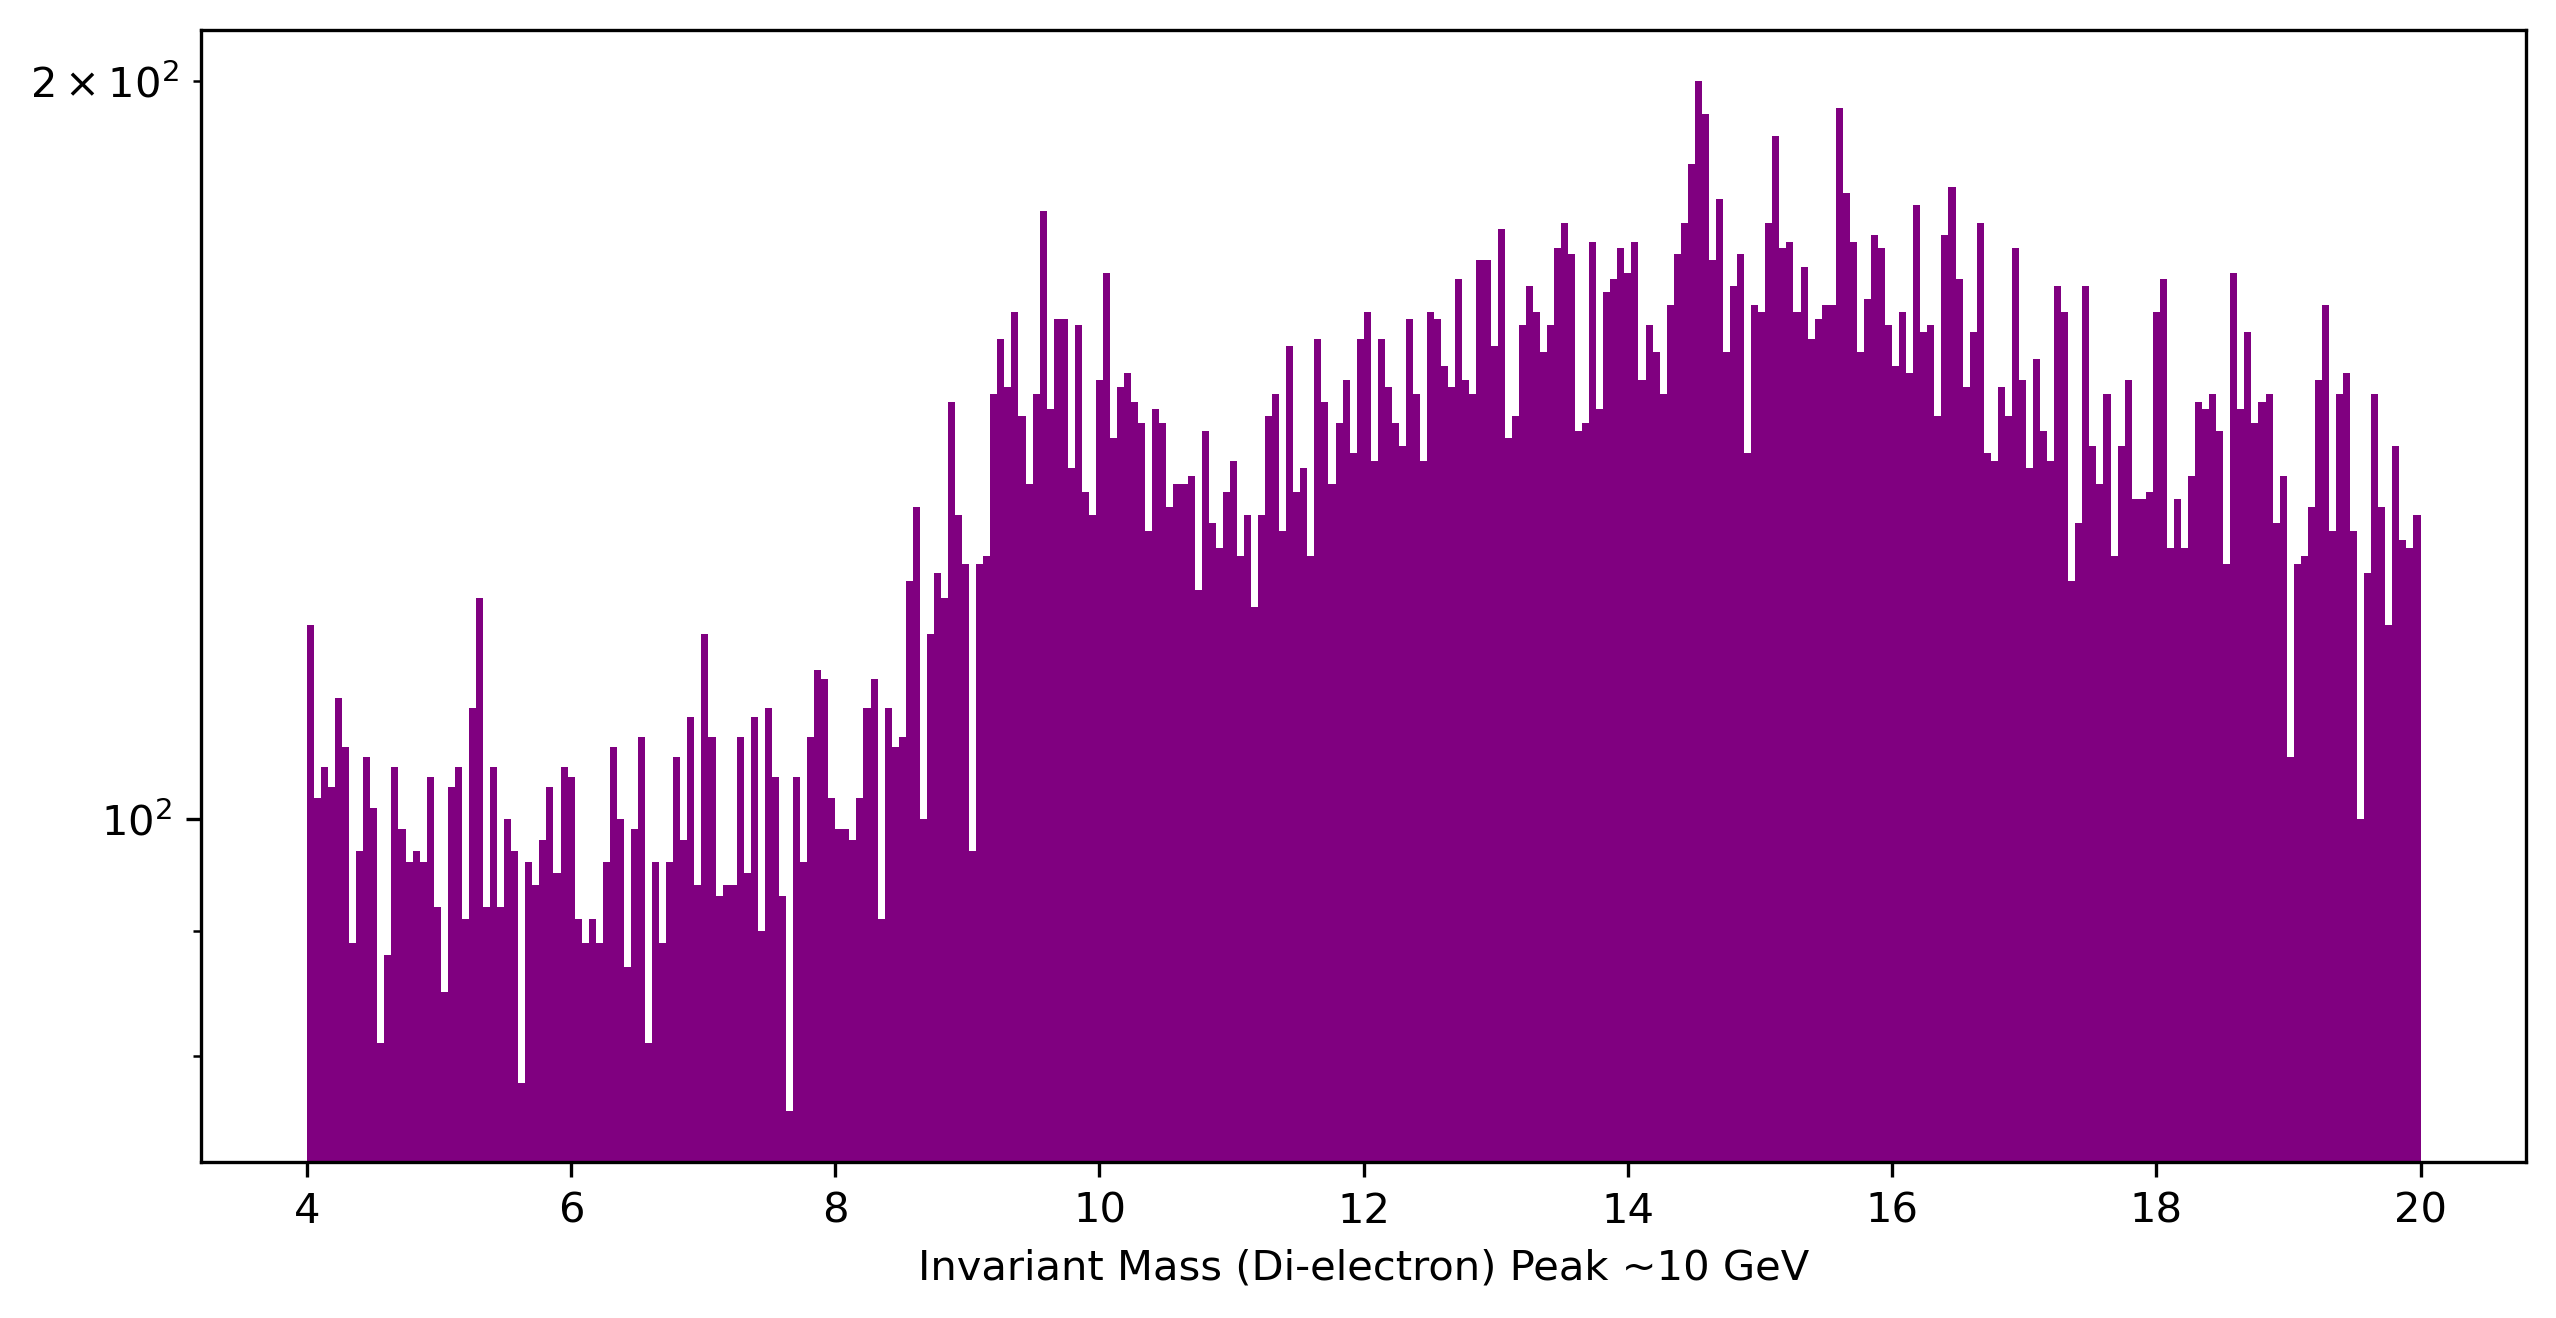

In [104]:
fig4, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

bins_mp4 = ax1.hist(mp, bins=300, range=(4, 20), color="purple")
ax1.set_xlabel('Invariant Mass (Di-electron) Peak ~10 GeV')
ax1.semilogy()

plt.show()

A, Mu, Sigma, Noise Coefficients [ 3.35675167e+01  9.60244406e+00  5.15188172e-01 -1.96451774e-01
  6.19022876e+00 -5.30760147e+01  2.33210947e+02]
Errors: [3.41265872e+00 5.77121277e-02 6.49917961e-02 1.37854674e-02
 4.70519033e-01 4.98742262e+00 1.58064662e+01]


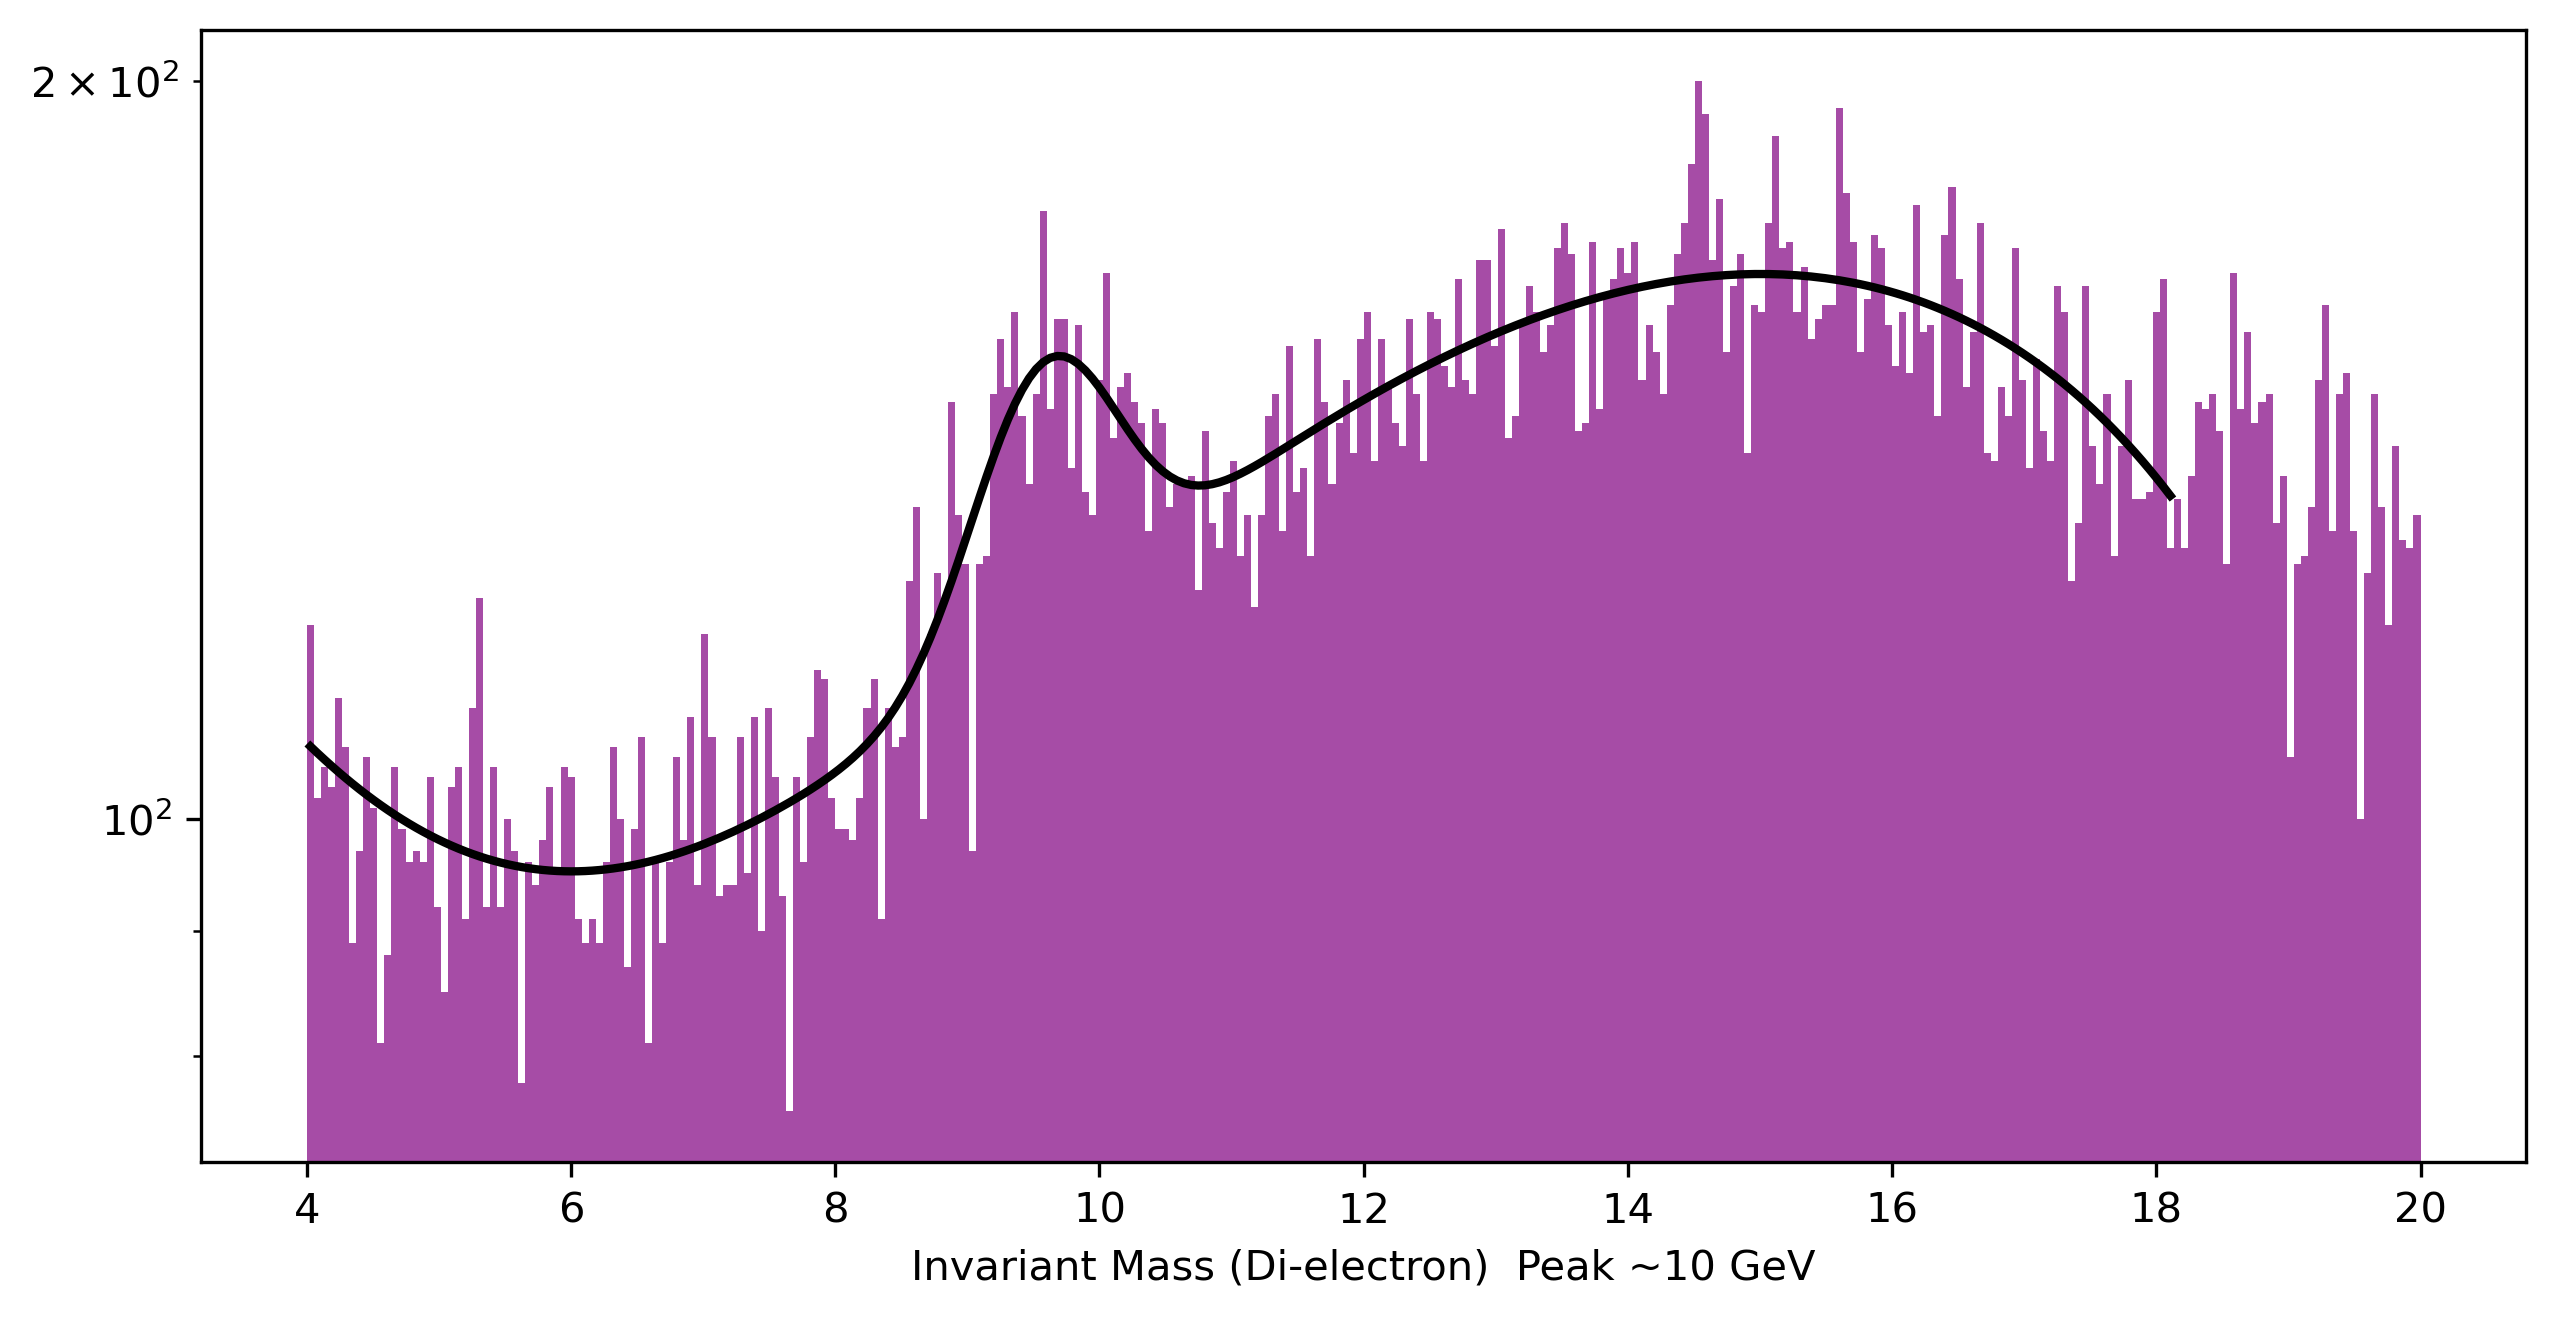

In [174]:
from scipy.optimize import curve_fit

bin_occupancies = bins_mp4[0]
bin_centers = []

for i in range(len(bin_occupancies)):
    bin_centers.append(0.5 * (bins_mp4[1][i+0] + bins_mp4[1][i+1]))
    

def gauss_noise3(x, A, mu, sigma, c, d, e, f):
    return A*np.exp(-(x - mu)**2 / 2 / sigma**2) + (c*x**3 + d*x**2 + e*x + f)
# define function that accounts for the signal's functional form (gaussian) and the noise's functional form (3rd order polynomial)

bin_centers2 = np.array(bin_centers[0:265])
bin_occupancies2 = bin_occupancies[0:265]

popt, pcov = curve_fit(gauss_noise3, bin_centers2, bin_occupancies2, p0 = [150, 10, .1, 1.5, 1, 1, 1])

print("A, Mu, Sigma, Noise Coefficients", popt)
error = np.sqrt(np.diag(pcov))
print("Errors:", error)

fit_vals3 = gauss_noise3(bin_centers2, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.hist(mp, bins=300, range=(4,20), color="purple", alpha = .7)
plt.xlabel('Invariant Mass (Di-electron)  Peak ~10 GeV')
ax1.semilogy()
ax1.plot(bin_centers2,fit_vals3, "k-", linewidth=2)
plt.show()

The mean invarient mass given by the fitted gaussian is 9.602 GeV. Looking to particles with a mass similar to this that has decay modes that include electron-positron pairs, the Y(1S) (upsilon) meson seems to be the parent particle reperesented here. The mass of Y(1S) is listed as 9.460 GeV. 

https://pdglive.lbl.gov/Particle.action?init=0&node=M049&home=MXXX030

## 7. Di-muon analysis

You will now apply the analysis that you built for the di-electron dataset to a dataset containing events with $\mu^-, \mu^+$ pairs (`MuRun2010B.csv`).  Nearly all of the code that you wrote above should be applicable to the di-muon dataset with minimal changes.

Repeat steps 1-6 from the previous section with the muon dataset.  After doing this, determine whether the di-muon invariant-mass distribution displays the same peaks as the di-electron distribution.  What similarities or differences exist?

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math

E1_mu, E2_mu = [], [] # set up of initial arrays
px1_mu, px2_mu, py1_mu, py2_mu, pz1_mu, pz2_mu = [], [], [], [], [], []

f = open('MuRun2010B.csv', 'r')
lin = f.readline() # get rid of first line
lin = f.readline() 
while len(lin) > 1:
    arr = lin.split(',') # splits the columns into an array
    E1_mu.append(float(arr[3])) # pulls out data from needed columns and appends
    E2_mu.append(float(arr[12])) # to individual arrays for calculations/plotting
    px1_mu.append(float(arr[4])) 
    px2_mu.append(float(arr[13]))
    py1_mu.append(float(arr[5]))
    py2_mu.append(float(arr[14]))
    pz1_mu.append(float(arr[6]))
    pz2_mu.append(float(arr[15]))
    lin = f.readline() # reads in next line for the next loop
    

Ei_mu = [] # set up arrays for values that must be calculated
p1_mu = []
p2_mu = []
pi_mu = []
m1_sq_mu = []
m2_sq_mu = []

px_mu = []
py_mu = []
pz_mu = []
mp_mu = []

for i in range(100000):
    Ei_mu.append(E1_mu[i] + E2_mu[i]) # loop does the calculation and appends for each index
    p1_mu.append(math.sqrt(px1_mu[i]**2 + py1_mu[i]**2 + pz1_mu[i]**2))
    p2_mu.append(math.sqrt(px2_mu[i]**2 + py2_mu[i]**2 + pz2_mu[i]**2))
    pi_mu.append(math.sqrt(p1_mu[i]**2 + p2_mu[i]**2 + 2*(px1_mu[i] * px2_mu[i] + py1_mu[i] * py2_mu[i] + pz1_mu[i] * pz2_mu[i])))
    m1_sq_mu.append(E1_mu[i]**2 - p1_mu[i]**2)
    m2_sq_mu.append(E2_mu[i]**2 - p2_mu[i]**2)
    
    px_mu.append(px1_mu[i] + px2_mu[i])
    py_mu.append(py1_mu[i] + py2_mu[i])
    pz_mu.append(pz1_mu[i] + pz2_mu[i])
    mp_mu.append(math.sqrt((Ei_mu[i]**2 - px_mu[i]**2 - py_mu[i]**2 - pz_mu[i]**2))) 
# if statement unneeded as this data set seemed to result in no square root of a negative terms
# calculates the mass of the parent particle for each event, accounting for units of momentum

In [ ]:
fig5, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300)
bins9 = ax1.hist(E1_mu, bins=300, range=(0,150))
ax1.set_xlabel('E1 (Di-muon)')

bins10 = ax2.hist(E2_mu, bins=300, range=(0,150), color="red")
ax2.set_xlabel('E2 (Di-muon)')

bins11 = ax3.hist(Ei_mu, bins=300, range=(0,150), color="purple")
ax3.set_xlabel('Ei (Di-muon)')

plt.show()

In [ ]:
fig6, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300)
bins12 = ax1.hist(p1_mu, bins=300, range=(0,150))
ax1.set_xlabel('p1 (Di-muon)')

bins13 = ax2.hist(p2_mu, bins=300, range=(0,150), color="red")
ax2.set_xlabel('p2 (Di-muon)')

bins14 = ax3.hist(pi_mu, bins=300, range=(0,150), color="purple")
ax3.set_xlabel('pi (Di-muon)')

plt.show()

In [ ]:
fig7, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=300)
bins15 = ax1.hist(m1_sq_mu, bins=300, range=(0, .03))
ax1.set_xlabel('m1 squared (Di-muon)')
ax1.semilogy()

bins16 = ax2.hist(m2_sq_mu, bins=300, range=(0,.03), color="red")
ax2.set_xlabel('m2 squared (Di-muon)')
ax2.semilogy()

plt.show()

Muon has mass of ~.10565 GeV. When that is squared, the result is .0111. This matches up with the histogram (blue), which is centered around .11 GeV squared. The mass of the antimuon is the same so the second histogram (red) also matches up with the expected value.

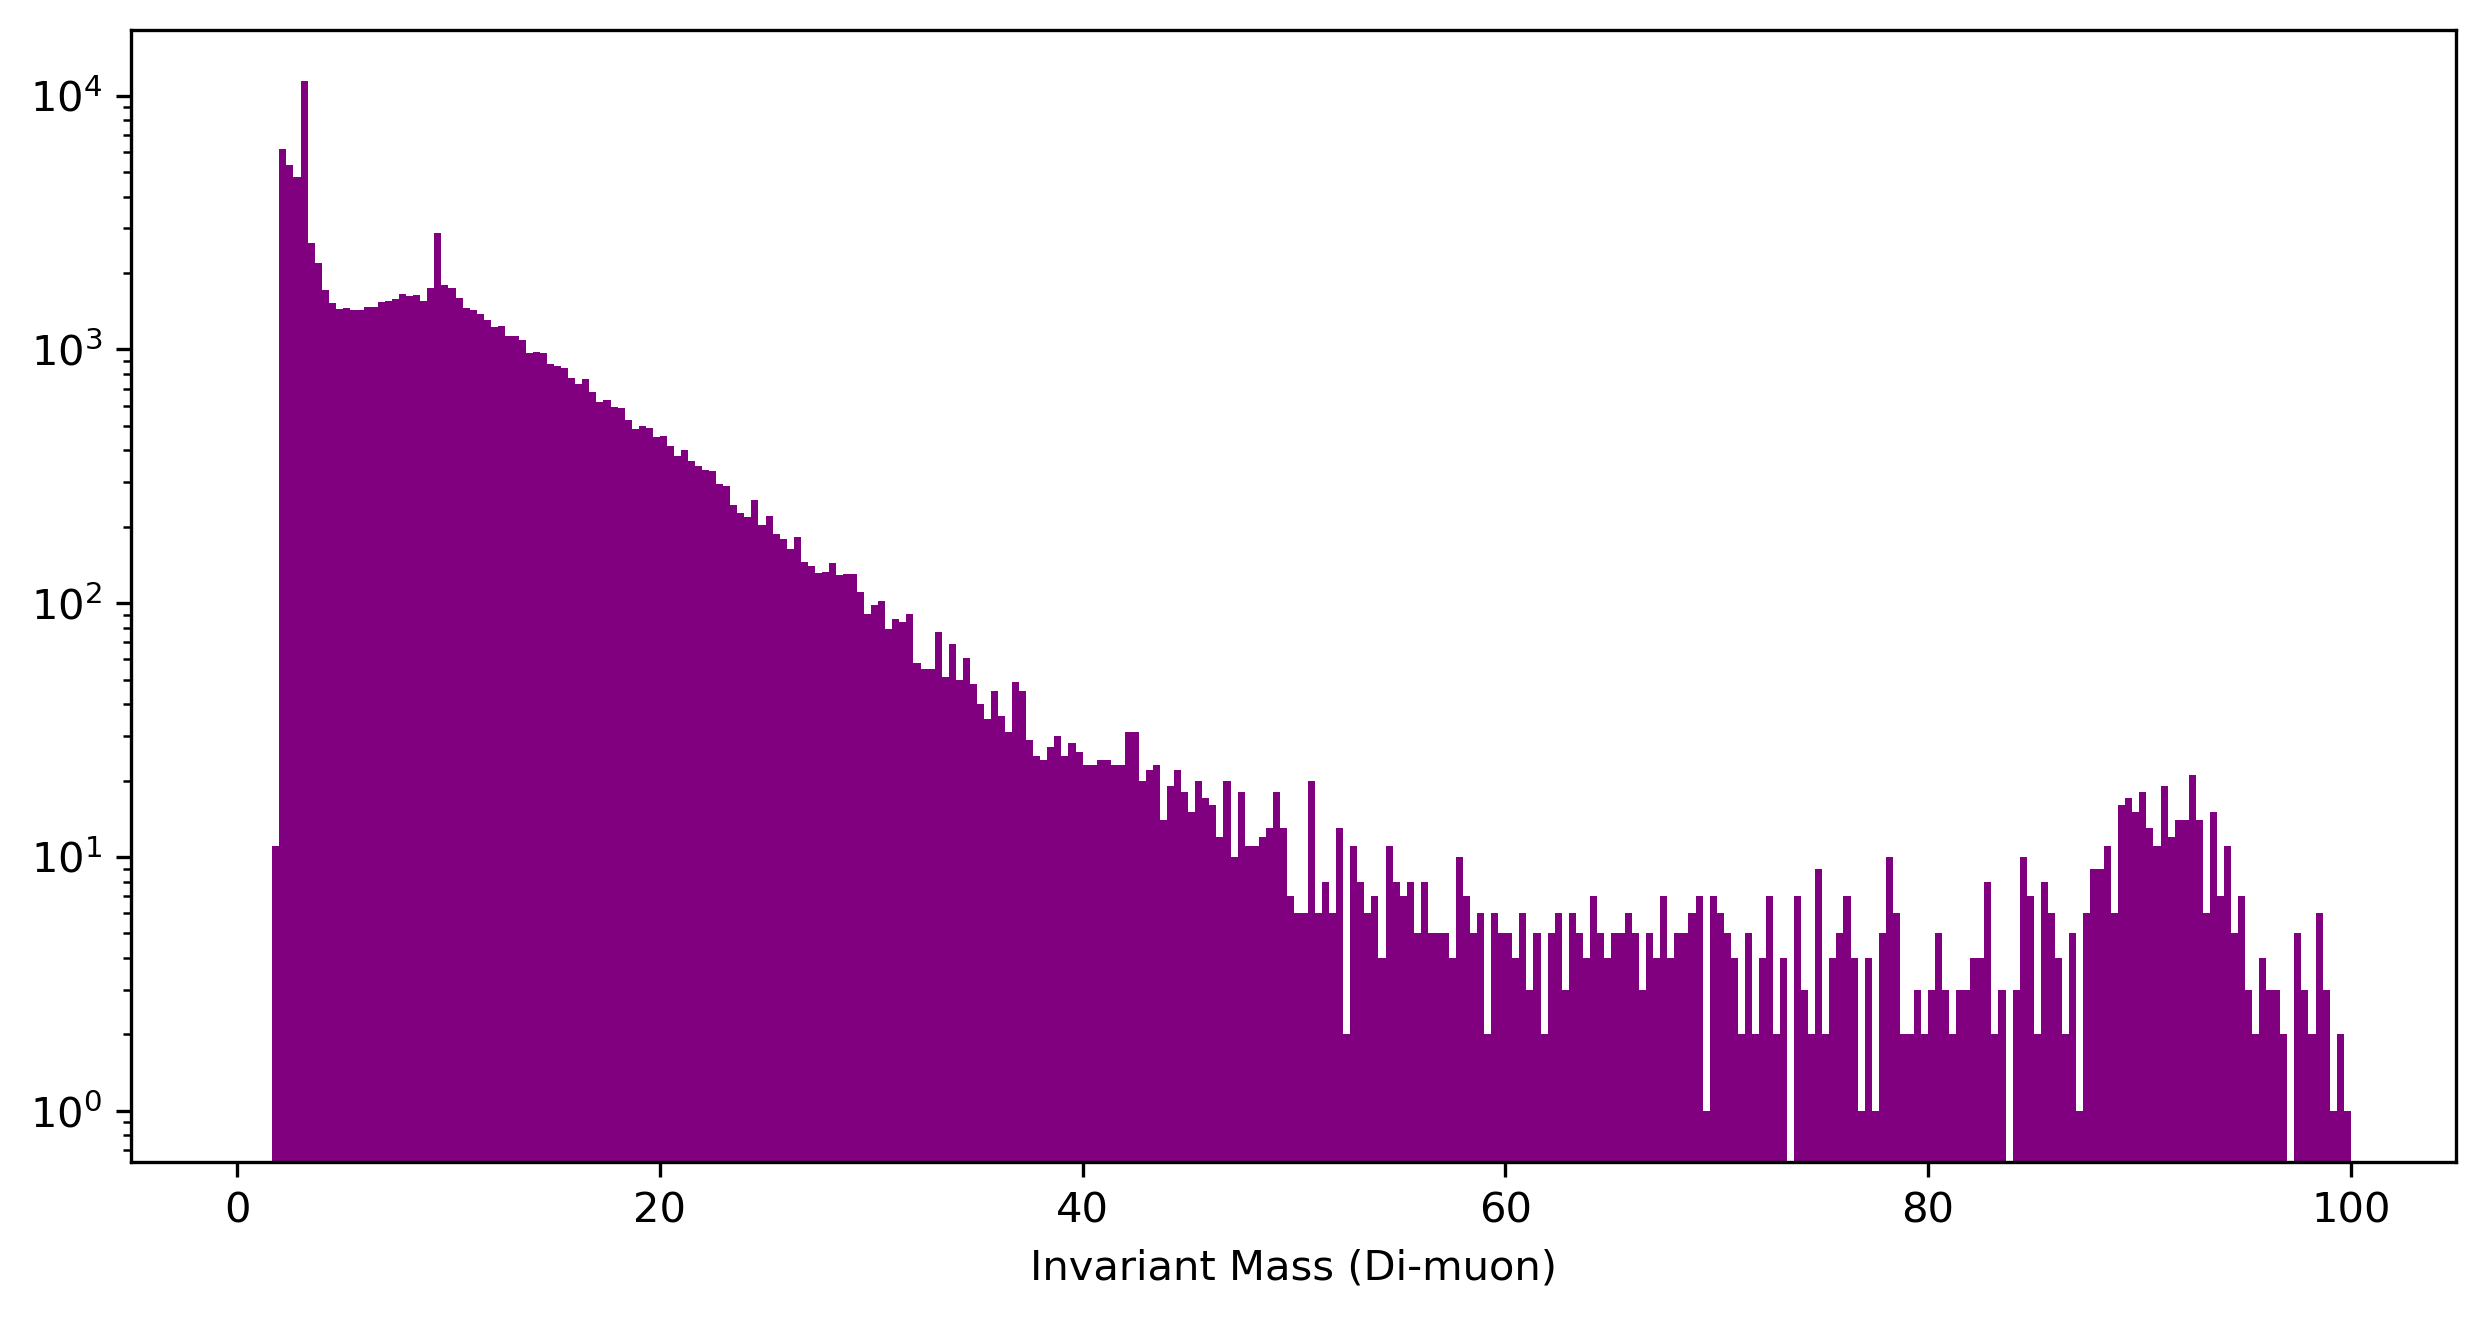

In [70]:
fig8, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

binsmu_mp1 = ax1.hist(mp_mu, bins=300, range=(0, 100), color="purple")
ax1.set_xlabel('Invariant Mass (Di-muon)')
ax1.semilogy()

plt.show()

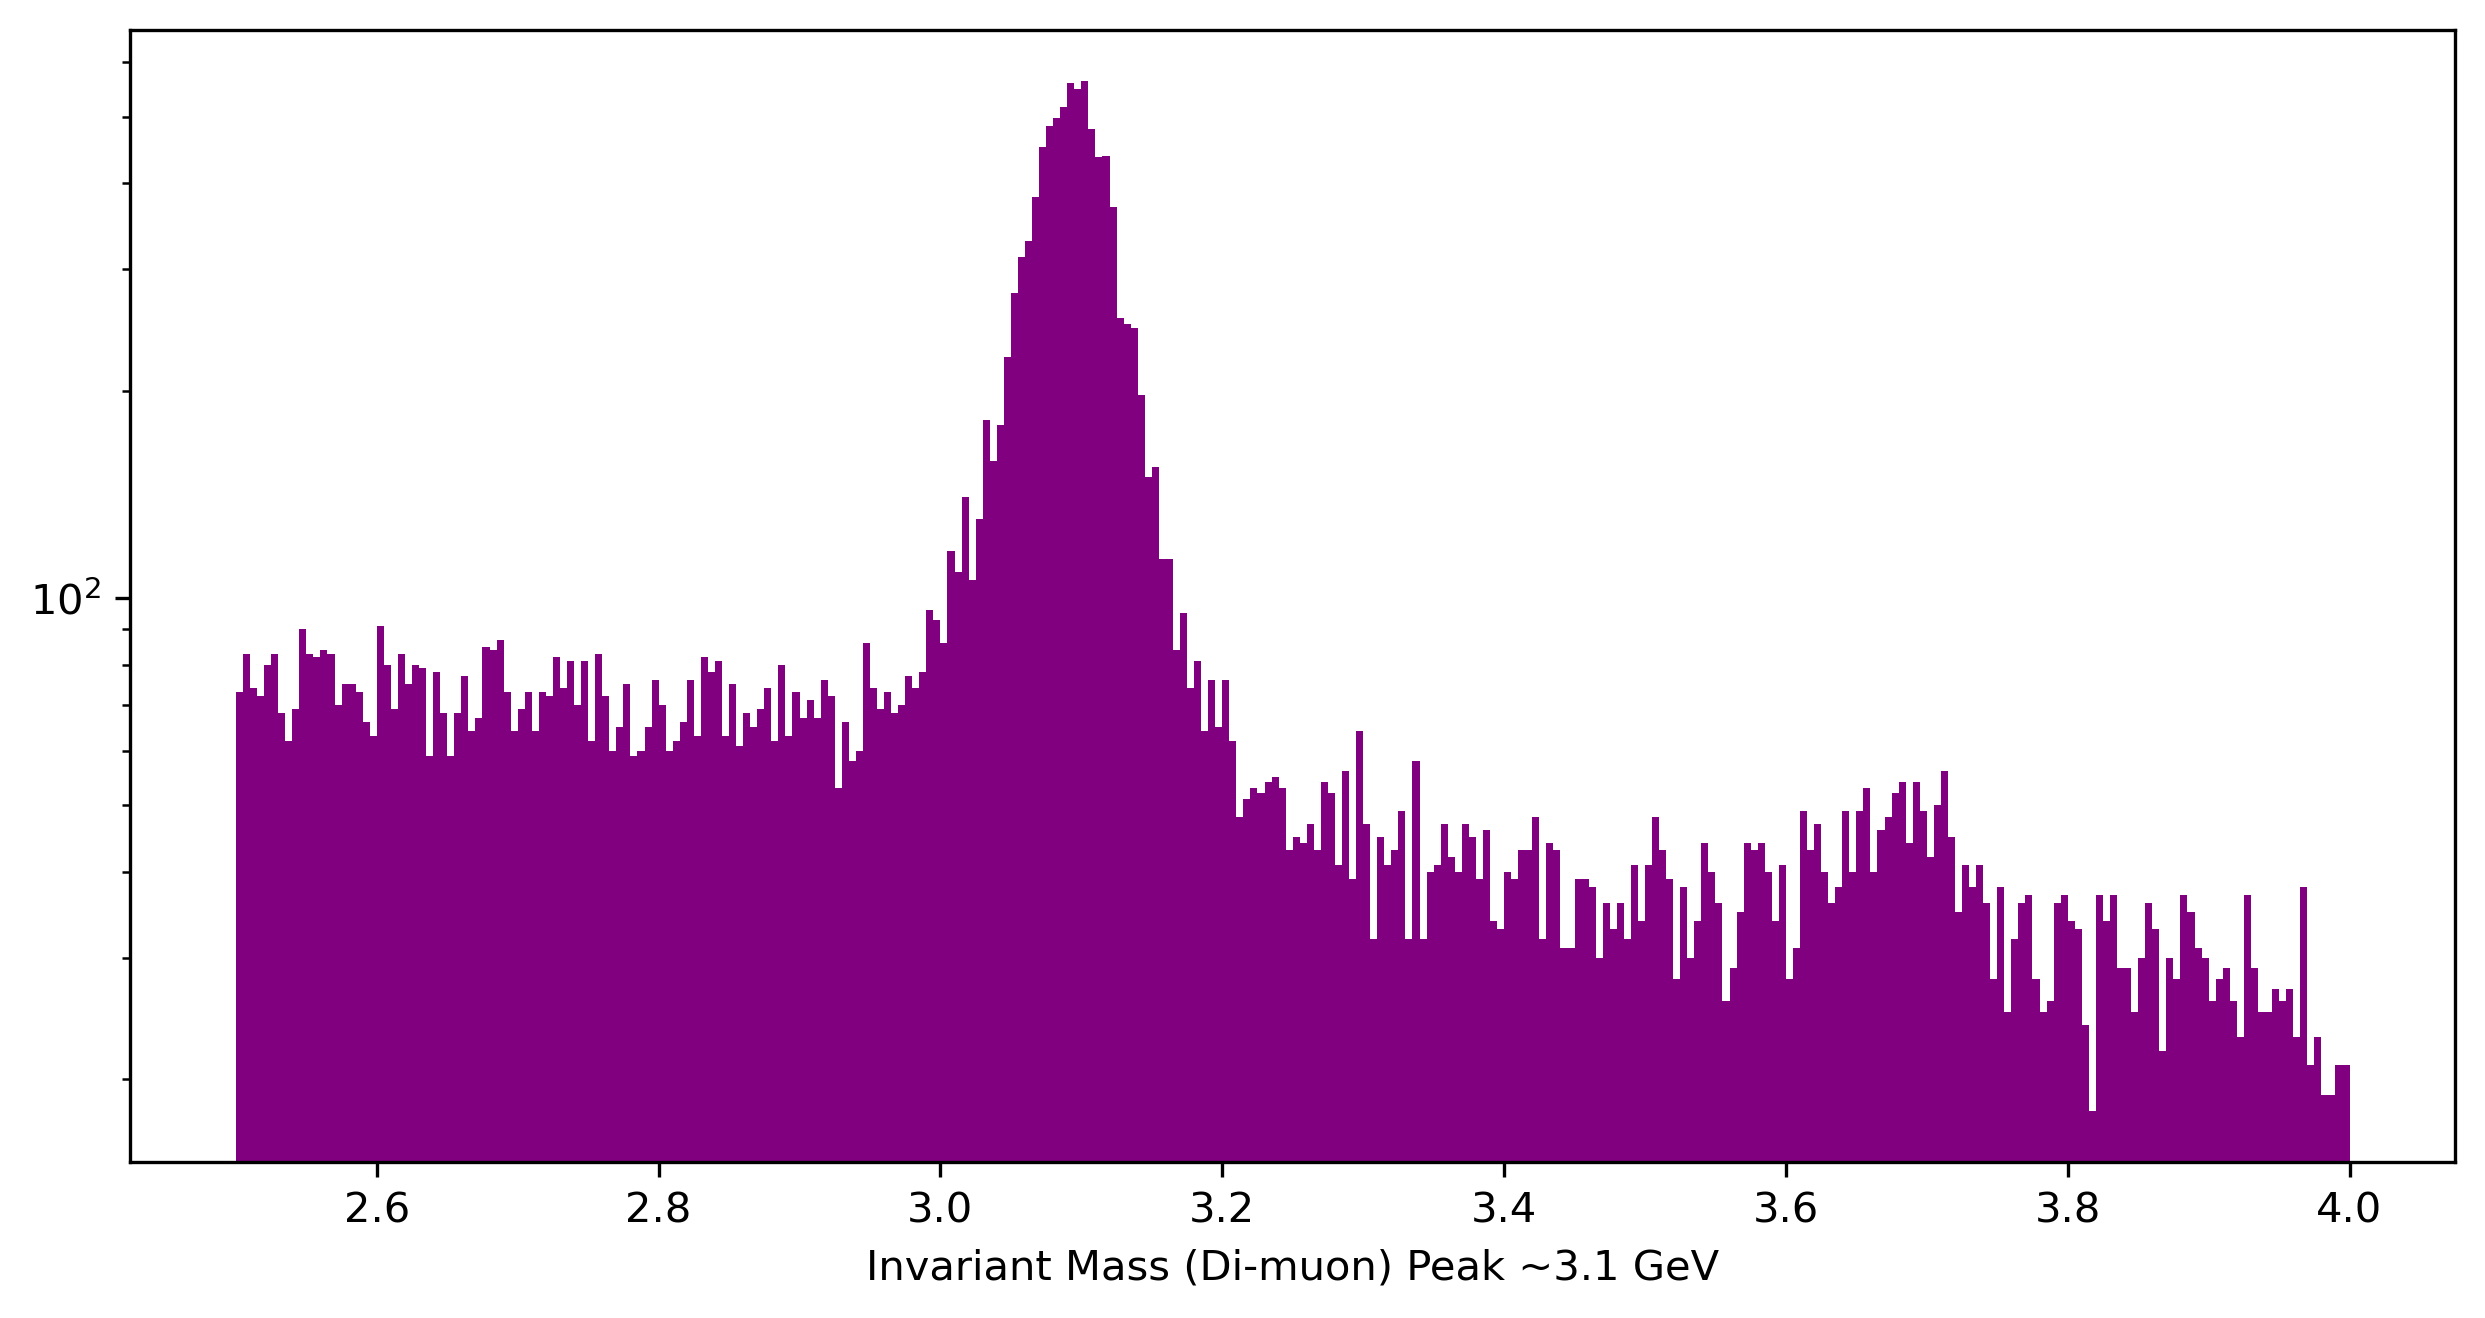

In [71]:
fig8, (ax1) = plt.subplots(1,1, figsize=(10,5), dpi=300)

binsmu_mp2 = ax1.hist(mp_mu, bins=300, range=(2.5, 4), color="purple")
ax1.set_xlabel('Invariant Mass (Di-muon) Peak ~3.1 GeV')
ax1.semilogy()

plt.show()

A, Mu, Sigma, Noise Coefficients [ 4.77527258e+02  3.09291144e+00 -3.18180836e-02  4.30257187e+01
  1.90799737e+02]
Errors: [4.74994581e+00 3.61823339e-04 3.73459362e-04 2.95014658e+00
 8.93854483e+00]


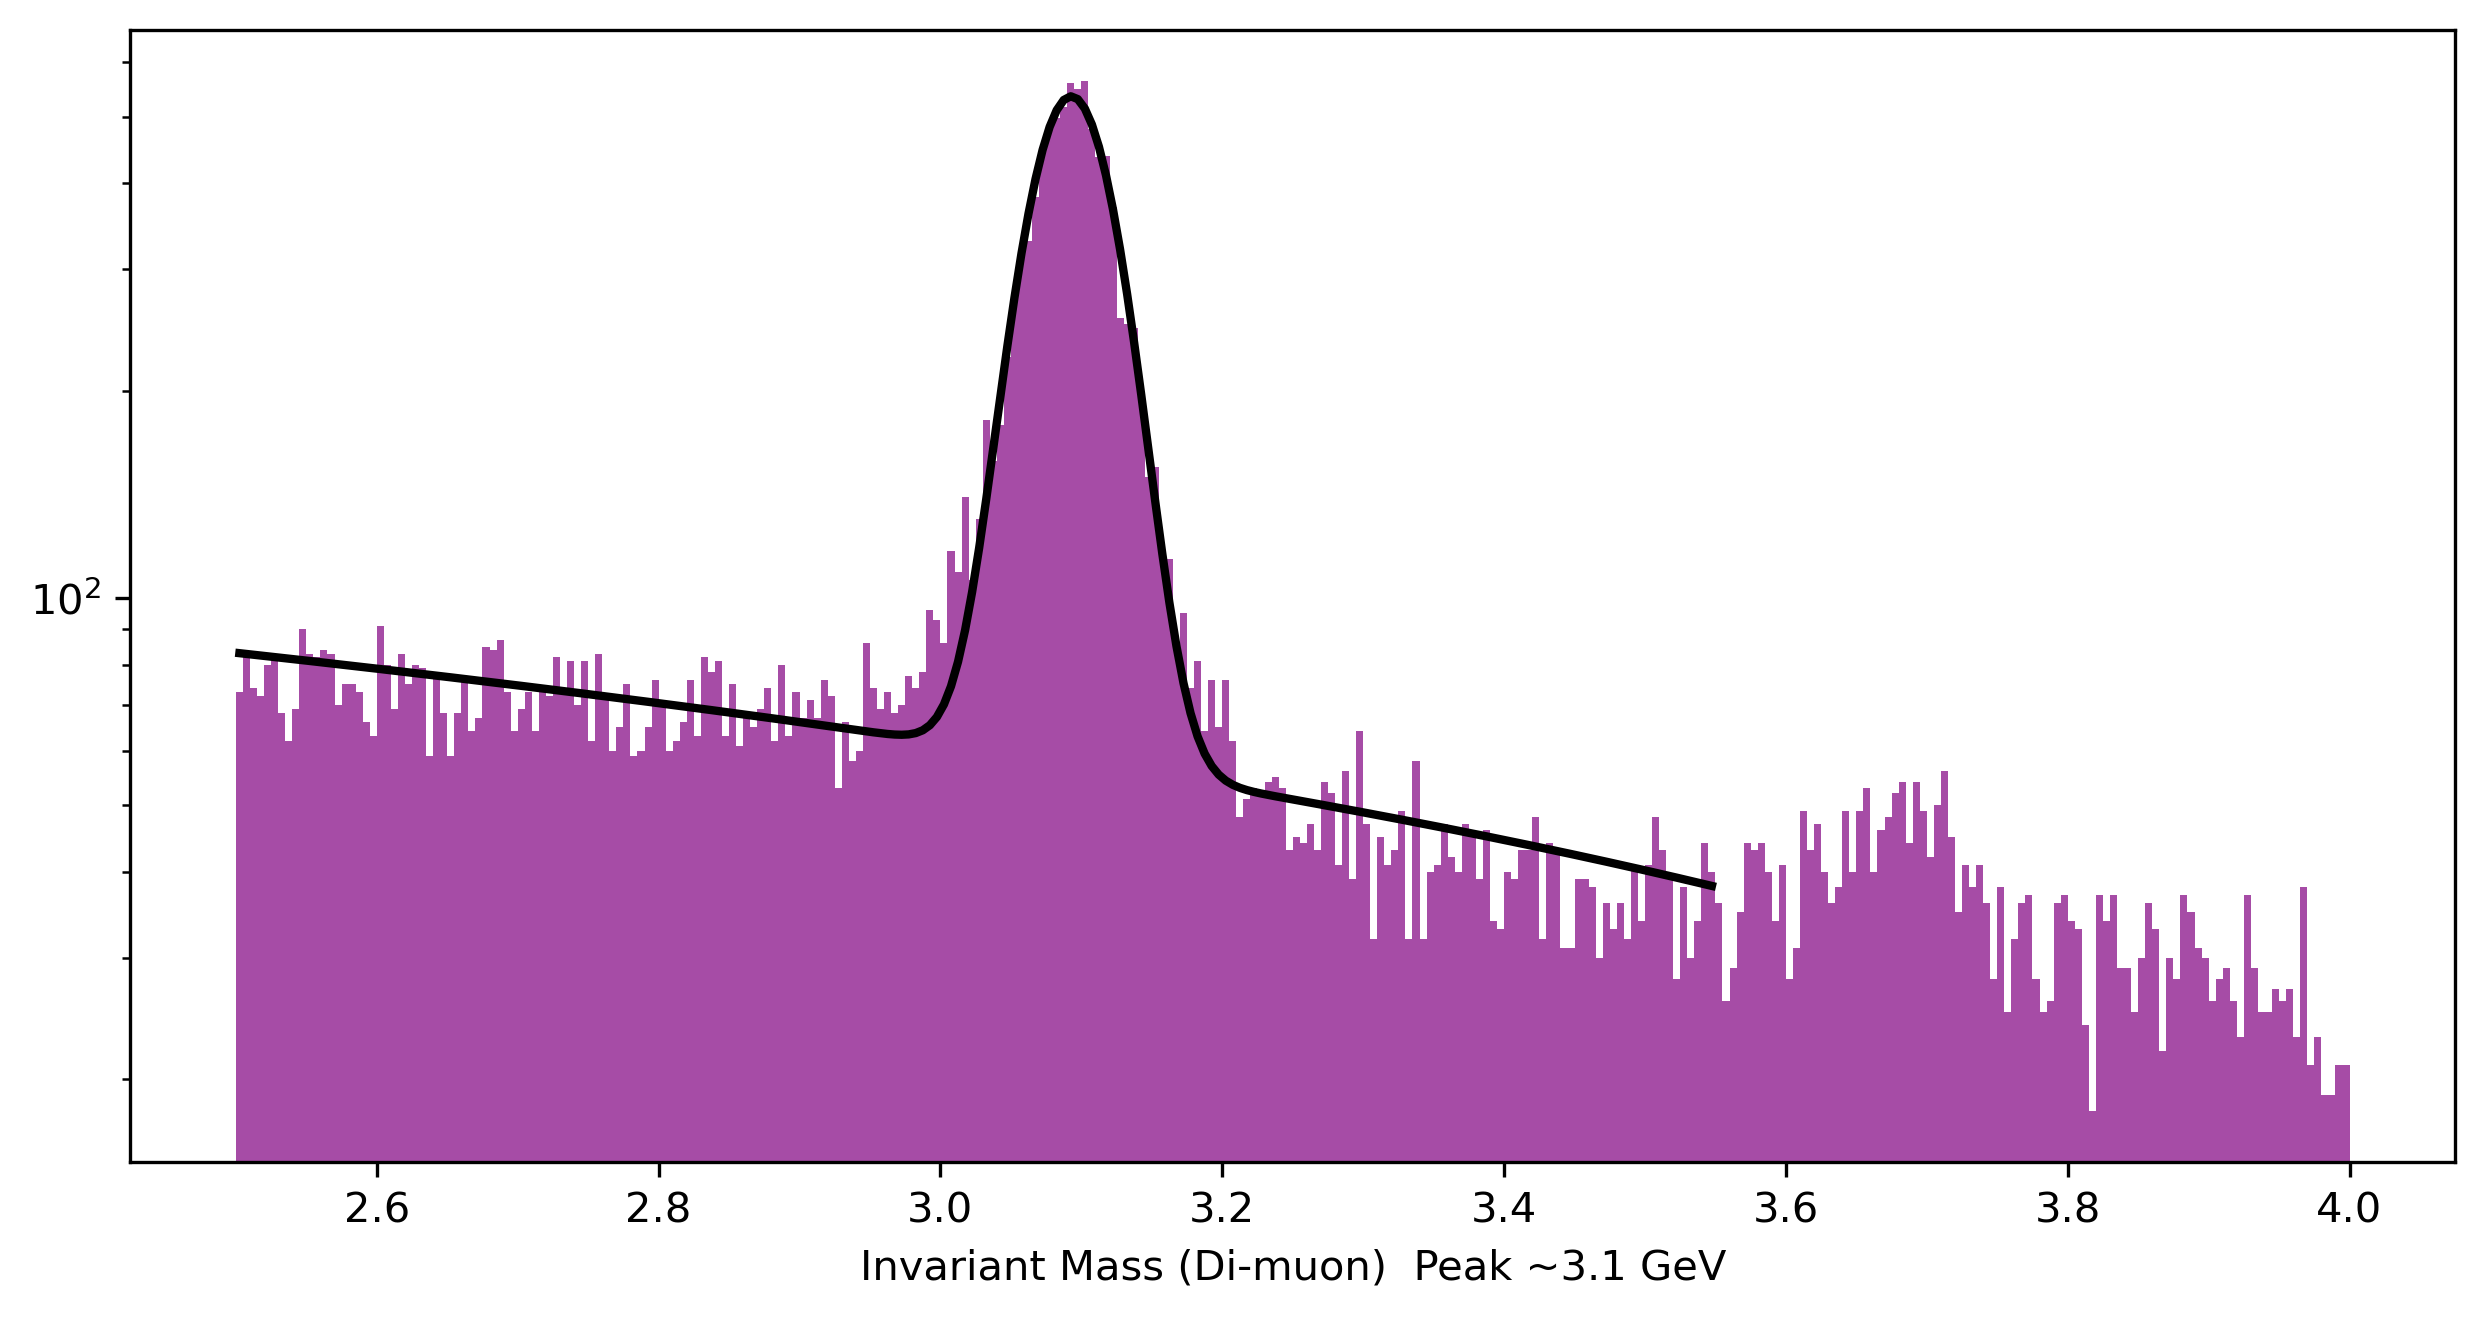

In [175]:
from scipy.optimize import curve_fit

bin_occupancies = binsmu_mp2[0]
bin_centers = []

for i in range(len(bin_occupancies)):
    bin_centers.append(0.5 * (binsmu_mp2[1][i+0] + binsmu_mp2[1][i+1]))
    

def gauss_noise4(x, A, mu, sigma, c, d):
    return A*np.exp(-(x - mu)**2 / 2 / sigma**2) + (-c*x + d)
# define function that accounts for the signal's functional form (gaussian) and the noise's functional form (linear)

bin_centers2 = np.array(bin_centers[0:210])
bin_occupancies2 = bin_occupancies[0:210]

popt, pcov = curve_fit(gauss_noise4, bin_centers2, bin_occupancies2, p0 = [100, 3.1, .1, 3.33, 100])

print("A, Mu, Sigma, Noise Coefficients", popt)
error = np.sqrt(np.diag(pcov))
print("Errors:", error)

fit_vals4 = gauss_noise4(bin_centers2, popt[0], popt[1], popt[2], popt[3], popt[4])

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.hist(mp_mu, bins=300, range=(2.5,4), color="purple", alpha = .7)
plt.xlabel('Invariant Mass (Di-muon)  Peak ~3.1 GeV')
ax1.semilogy()
ax1.plot(bin_centers2,fit_vals4, "k-", linewidth=2)
plt.show()

The fitted gaussian provides a mean mass of 3.0929 GeV. Similar to the electron-positron data analysis, the J/psi meson weighing 3.0969 GeV seems to be the parent particle for this set of electron pairs. The J/psi meson can decay into an electron-positron pair, but it can also decay into a muon pair which we see here. Muons are less succeptible to energy loss in the detectors and certain electron-positron data points needed to be changed to 0 in order to analyze, so the muon data set has much better signal to noise ratio. This allows for the peaks to be much more pronounced and clear.